In [1]:
source("Main.R")
source("Conf.R")
source("Utilities.R")
source("DAVID_query.R")
library("factoextra")
library("maptree")
library(repr)
library("stringr")

corrplot 0.84 loaded


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘pls’


The following object is masked from ‘package:corrplot’:

    corrplot


The following object is masked from ‘package:stats’:

    loadings


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following o

In [2]:
covariateNames <- read.csv("/home/beraslan/jovian-work/analysisSingle/GroupInteractionsLMCovariates82GeneModules.csv")
genes <- as.data.frame(read.csv("/home/beraslan/jovian-work/analysisSingle/GroupInteractionsSelectedGenes82GeneModules.csv"),stringsAsFactors = FALSE)
guideMatrix <- as.data.frame(read.csv("/home/beraslan/jovian-work/analysisSingle/GroupInteractionsGuideMatrix.csv"), stringsAsFactors = FALSE)
expressionMatrix <- as.data.frame(read.csv("/home/beraslan/jovian-work/analysisSingle/GroupInteractionsExpressionMatrix.csv"),stringsAsFactors = FALSE)


In [3]:
controlCellsExpression <- read.csv("/home/beraslan/jovian-work/analysisSingle/BayesLMPredResults/SingleOuputRes/ControlCellsModuleExpressions.csv",stringsAsFactors = FALSE)

rownames(controlCellsExpression) <- controlCellsExpression$X
controlCellsExpression$X = NULL


In [4]:
controlMeanModuleExp = sapply(controlCellsExpression, function(x){return(mean(x, na.rm = TRUE))})

In [5]:
controlMeanModuleExp

GeneModLog_1  GeneModLog_2  GeneModLog_3  GeneModLog_4  GeneModLog_5 
 0.0237813961  0.0247321889 -0.0045395047  0.0192913699 -0.0058579142 
 GeneModLog_6  GeneModLog_7  GeneModLog_8  GeneModLog_9 GeneModLog_10 
 0.0375297462  0.0420895175 -0.0201490263 -0.0093553850 -0.0052710236 
GeneModLog_11 GeneModLog_12 GeneModLog_13 GeneModLog_14 GeneModLog_15 
 0.0055263797 -0.0046593621  0.0296150411  0.0020168346  0.0108633814 
GeneModLog_16 GeneModLog_17 GeneModLog_18 GeneModLog_19 GeneModLog_20 
-0.0074713275  0.0008281227 -0.0027677616  0.0069732554  0.0057629664 
GeneModLog_21 GeneModLog_22 GeneModLog_23 GeneModLog_24 GeneModLog_25 
 0.0089868397  0.0010603418 -0.0042919467  0.0062148112  0.0092221051 
GeneModLog_26 GeneModLog_27 GeneModLog_28 GeneModLog_29 GeneModLog_30 
 0.0089463440  0.0462140522  0.0049245898  0.0042583068  0.0031330932 
GeneModLog_31 GeneModLog_32 GeneModLog_33 GeneModLog_34 GeneModLog_35 
 0.0173553334  0.0055847229 -0.0024622269 -0.0009199822  0.0061627079 
GeneModLog_36 GeneModLog_37 GeneModLog_38 GeneModLog_39 GeneModLog_40 
 0.0172449638  0.0011461736  0.0171546899 -0.0064854602  0.0197212697 
GeneModLog_41 GeneModLog_42 GeneModLog_43 GeneModLog_44 GeneModLog_45 
 0.0018967522 -0.0026805750  0.0088965280  0.0153294353  0.0132581429 
GeneModLog_46 GeneModLog_47 GeneModLog_48 GeneModLog_49 GeneModLog_50 
-0.0004315884  0.0022638415  0.0008814340  0.0013883299 -0.0193665648 
GeneModLog_51 GeneModLog_52 GeneModLog_53 GeneModLog_54 GeneModLog_55 
-0.0047007928 -0.0075485505  0.0236861954  0.0194943629  0.0080720707 
GeneModLog_56 GeneModLog_57 GeneModLog_58 GeneModLog_59 GeneModLog_60 
-0.0011696963 -0.0007281798 -0.0036006845  0.0084910239  0.0271259803 
GeneModLog_61 GeneModLog_62 GeneModLog_63 GeneModLog_64 GeneModLog_65 
 0.0188119842  0.0149625771  0.0011822668  0.0088888084 -0.0013301289 
GeneModLog_66 GeneModLog_67 GeneModLog_68 GeneModLog_69 GeneModLog_70 
 0.0051900206 -0.0017890986  0.0400761809  0.0135173444  0.0388556314 
GeneModLog_71 GeneModLog_72 GeneModLog_73 GeneModLog_74 GeneModLog_75 
-0.0065320294  0.0326083976  0.0389397045  0.0110396196  0.0216010880 
GeneModLog_76 GeneModLog_77 GeneModLog_78 GeneModLog_79 GeneModLog_80 
-0.0034610022 -0.0025003804 -0.0070836632  0.0223921526  0.0450010886 
GeneModLog_81 GeneModLog_82 
 0.0116663119  0.0073608259

In [6]:
guideMatrix <- merge(guideMatrix, expressionMatrix, by="X")
rownames(guideMatrix) <- expressionMatrix$X
guideMatrix$X <- NULL

In [7]:
pValsAll <- read.csv(paste0("/home/beraslan/jovian-work/analysisSingle/pvalues_MixedEffect_KOGroups_82GeneModules.csv" ))
rownames(pValsAll) <- pValsAll$X
pValsAll$X <- NULL

coefsAll <- read.csv(paste0("/home/beraslan/jovian-work/analysisSingle/coefs_MixedEffect_KOGroups_82GeneModules.csv" ))
rownames(coefsAll) <- coefsAll$X
coefsAll$X <- NULL

colnames(pValsAll) <- genes$X0[1:(dim(pValsAll)[2])]
colnames(coefsAll) <- genes$X0[1:(dim(coefsAll)[2])]
    

In [8]:
tail(coefsAll)

,GeneModLog_1,GeneModLog_2,GeneModLog_3,GeneModLog_4,GeneModLog_5,GeneModLog_6,GeneModLog_7,GeneModLog_8,GeneModLog_9,GeneModLog_10,⋯,GeneModLog_73,GeneModLog_74,GeneModLog_75,GeneModLog_76,GeneModLog_77,GeneModLog_78,GeneModLog_79,GeneModLog_80,GeneModLog_81,GeneModLog_82
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,-0.14669625,-0.36481836,0.20260596,-0.39964529,0.1552341,-0.22742493,-0.3693107,0.2736001,-0.05642869,0.05753256,⋯,0.03549199,0.03638870,-0.21562746,0.27409091,0.2729135,0.4427776,-0.08096850,-0.4216829,-0.127229712,0.07142293
5,-0.26168932,0.94946371,-0.07920924,-0.37722270,-0.5298829,-0.12180729,0.5107883,-0.4806903,0.09410810,-0.13098723,⋯,-0.56256542,0.01022159,-0.10294425,0.48329285,-0.3238943,-0.6850928,-0.34886902,0.9182316,0.693827937,-0.44451974
6,-0.05469291,-0.22255208,0.05832219,-0.06336058,0.1638717,-0.10101181,-0.2232360,0.1571784,0.08553249,0.12983335,⋯,0.00579397,-0.07008629,-0.02650586,-0.01469782,0.1206717,0.1563886,-0.04635137,-0.3143449,-0.184205953,0.13937873
7,0.02712746,-0.25749608,0.02746776,-0.04344794,0.1961855,-0.02086122,-0.1727029,0.1261838,-0.01212122,-0.02899781,⋯,0.20318373,-0.04319964,0.07076153,-0.19305197,0.1294525,0.1751804,0.02611505,-0.2865817,-0.223364441,0.12335792
8,0.01572762,0.86795183,-0.22901526,0.02978159,-0.6193029,0.16061162,0.6402618,-0.6192857,-0.01650818,-0.14006694,⋯,-0.54748250,-0.08229693,-0.23750393,0.12545007,-0.5574530,-0.6746698,-0.08362088,0.9807804,0.544597236,-0.11151988
9,-0.04027953,0.07602656,-0.29417017,0.83869582,-0.3395528,0.03535936,0.1793557,-0.3036649,-0.27513691,-0.10118068,⋯,-0.25624755,-0.04048868,0.02692992,-0.17586532,-0.4273901,-0.4658412,0.09709955,0.2209966,-0.001448789,-0.43493244


In [9]:
tail(pValsAll)

,GeneModLog_1,GeneModLog_2,GeneModLog_3,GeneModLog_4,GeneModLog_5,GeneModLog_6,GeneModLog_7,GeneModLog_8,GeneModLog_9,GeneModLog_10,⋯,GeneModLog_73,GeneModLog_74,GeneModLog_75,GeneModLog_76,GeneModLog_77,GeneModLog_78,GeneModLog_79,GeneModLog_80,GeneModLog_81,GeneModLog_82
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.023354e-66,9.827558e-85,⋯,4.858502e-12,1.972262e-20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.567103e-77,0.000000e+00,5.488612e-130,9.576236e-33
5,0.000000e+00,0.000000e+00,1.853847e-72,0.000000e+00,0.000000e+00,8.098818e-133,0.000000e+00,0.000000e+00,1.746110e-129,4.690703e-306,⋯,0.000000e+00,2.810692e-02,3.932992e-63,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,2.649310e-38,1.031580e-178,1.396191e-35,1.231223e-22,3.906640e-309,2.324603e-81,1.856345e-294,1.136051e-153,6.933029e-95,1.453219e-265,⋯,3.715179e-01,2.436526e-45,4.977200e-05,1.767021e-02,3.007465e-80,4.031138e-135,3.263352e-17,2.363634e-291,3.120030e-170,9.699923e-76
7,6.607182e-08,1.778754e-169,8.039094e-07,1.611266e-08,0.000000e+00,8.948097e-04,2.657593e-126,2.953111e-71,1.366261e-02,5.507202e-11,⋯,8.519426e-153,2.298625e-13,8.208355e-20,4.135389e-151,9.884058e-66,2.913836e-120,6.345939e-05,1.245766e-172,4.577527e-177,8.010527e-43
8,3.464059e-03,0.000000e+00,0.000000e+00,3.007785e-04,0.000000e+00,1.123767e-125,0.000000e+00,0.000000e+00,1.719207e-03,1.871523e-191,⋯,0.000000e+00,8.087892e-39,1.088611e-178,6.892120e-57,0.000000e+00,0.000000e+00,6.406067e-33,0.000000e+00,0.000000e+00,5.430263e-31
9,2.903105e-02,2.553406e-02,7.059104e-47,5.548753e-193,2.010723e-71,1.254153e-01,1.341454e-11,1.350253e-31,2.278312e-52,4.760935e-10,⋯,1.444619e-19,6.147124e-02,3.452534e-01,8.031881e-11,1.939289e-53,5.764417e-64,5.175612e-05,3.925560e-09,9.599920e-01,1.414990e-39


In [10]:
# write.csv(coefsAll, "/home/beraslan/jovian-work/analysisSingle/MixedEffectLMOutputs/GroupInteractions_coefs_82geneModules.csv", quote=FALSE)
# write.csv(pValsAll, "/home/beraslan/jovian-work/analysisSingle/MixedEffectLMOutputs/GroupInteractions_pVals_82geneModules.csv", quote=FALSE)

In [11]:
koGroupNames = colnames(guideMatrix)[1:28]
koMatrix = guideMatrix[,koGroupNames]
head(koMatrix)

,G1,G2,G3,G4,G5,G6,G7,G1.G2,G1.G3,G1.G4,⋯,G3.G4,G3.G5,G3.G6,G3.G7,G4.G5,G4.G6,G4.G7,G5.G6,G5.G7,G6.G7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACGAAAGCAGTCTT-1-E3-1-0,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAACGAATCTCAACCC-1-E3-1-0,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAACGCTAGTTGTAGA-1-E3-1-0,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAACGCTCAAAGACGC-1-E3-1-0,1,1,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAACGCTCAGTGTACT-1-E3-1-0,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAAGAACAGCGAGTCA-1-E3-1-0,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [12]:
koNo = rowSums(koMatrix)
genes$X0 <- as.character(genes$X0)

In [13]:
allModuleAverageExps = list()
for(elem in koGroupNames){
    if(elem %in% c("G1","G2","G3","G4","G5","G6","G7")){
        sellCells = rownames(koMatrix[(koMatrix[,elem] == 1 & koNo == 1),])
    }else{
        sellCells = rownames(koMatrix[(koMatrix[,elem] == 1 & koNo == 3),])
    }
    
    tmpM <- guideMatrix[sellCells,genes$X0]
    moduleExp = apply(tmpM,2, mean)
    
    allModuleAverageExps <- lappend(allModuleAverageExps, moduleExp)
    
}

In [14]:
allModuleAverageExps <- as.data.frame(do.call(rbind, allModuleAverageExps))

In [15]:
rownames(allModuleAverageExps) <- paste0("Obs_",str_replace(koGroupNames,pattern = "\\.","\\+"))

In [16]:
head(allModuleAverageExps)

,GeneModLog_1,GeneModLog_2,GeneModLog_3,GeneModLog_4,GeneModLog_5,GeneModLog_6,GeneModLog_7,GeneModLog_8,GeneModLog_9,GeneModLog_10,⋯,GeneModLog_73,GeneModLog_74,GeneModLog_75,GeneModLog_76,GeneModLog_77,GeneModLog_78,GeneModLog_79,GeneModLog_80,GeneModLog_81,GeneModLog_82
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Obs_G1,-0.01459405,-0.06991230,0.02312581,-0.01678705,0.029891407,-0.03748798,-0.06154847,0.05101886,0.016098900,0.012068772,⋯,-0.01573191,-0.0001487286,-0.0018594114,0.018164962,0.025226127,0.033483171,-0.02334860,-0.092467739,-0.03166211,-0.003470447
Obs_G2,0.03733621,0.16213119,-0.04459249,0.08518083,-0.063485291,0.07782503,0.15252321,-0.07564740,-0.036218240,-0.017257391,⋯,0.02220281,0.0135402819,0.0218271119,0.001444322,-0.071349610,-0.087728706,0.06083739,0.206132797,0.10134898,-0.036489336
Obs_G3,0.02101863,0.04207407,-0.01010050,0.01715142,-0.019716374,0.02500433,0.04186180,-0.02258424,-0.013418447,-0.002118573,⋯,0.02242221,0.0085365471,0.0044374595,0.016695220,-0.008933910,-0.017358761,0.03290325,0.060082824,0.02738677,0.006604698
Obs_G4,-0.01231027,0.00999022,0.01001334,-0.01674287,0.013974046,-0.01902835,-0.01738468,0.03178877,0.003113050,0.012834920,⋯,-0.01602866,0.0055214127,-0.0072105873,0.028386802,0.008949897,0.014645381,-0.02384626,-0.007775304,0.01537067,-0.016949618
Obs_G5,0.03004361,-0.02549472,-0.01889295,0.02151334,-0.001456255,0.03595459,0.01148473,-0.02897922,-0.001575718,0.003011717,⋯,0.06763144,0.0158857610,0.0160827476,-0.034719292,0.042323641,0.013240924,0.06405208,0.010198288,-0.01327170,0.036022218
Obs_G6,0.04969452,0.07909653,-0.01166492,0.01824536,-0.030494702,0.09141862,0.10877258,-0.06024926,-0.021896503,-0.009949667,⋯,0.10889979,0.0360350529,0.0009454664,0.004867564,0.013316055,0.004545874,0.05478699,0.135179544,0.04740588,0.049557111


In [17]:
myR = rownames(allModuleAverageExps)
allModuleAverageExps = rbind(allModuleAverageExps, c("conrolCells" = controlMeanModuleExp))
rownames(allModuleAverageExps) = c(myR, "conrolCells")

In [18]:
allModuleAverageExps

,GeneModLog_1,GeneModLog_2,GeneModLog_3,GeneModLog_4,GeneModLog_5,GeneModLog_6,GeneModLog_7,GeneModLog_8,GeneModLog_9,GeneModLog_10,⋯,GeneModLog_73,GeneModLog_74,GeneModLog_75,GeneModLog_76,GeneModLog_77,GeneModLog_78,GeneModLog_79,GeneModLog_80,GeneModLog_81,GeneModLog_82
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Obs_G1,-0.014594054,-0.069912304,0.023125809,-0.016787054,0.029891407,-0.0374879810,-0.061548466,0.051018864,0.016098900,0.012068772,⋯,-0.015731907,-0.0001487286,-0.0018594114,0.0181649617,0.0252261270,0.033483171,-2.334860e-02,-0.092467739,-0.0316621061,-0.003470447
Obs_G2,0.037336210,0.162131190,-0.044592495,0.085180828,-0.063485291,0.0778250319,0.152523210,-0.075647400,-0.036218240,-0.017257391,⋯,0.022202809,0.0135402819,0.0218271119,0.0014443224,-0.0713496095,-0.087728706,6.083739e-02,0.206132797,0.1013489804,-0.036489336
Obs_G3,0.021018625,0.042074073,-0.010100501,0.017151417,-0.019716374,0.0250043350,0.041861799,-0.022584245,-0.013418447,-0.002118573,⋯,0.022422209,0.0085365471,0.0044374595,0.0166952195,-0.0089339101,-0.017358761,3.290325e-02,0.060082824,0.0273867688,0.006604698
Obs_G4,-0.012310267,0.009990220,0.010013340,-0.016742870,0.013974046,-0.0190283541,-0.017384684,0.031788767,0.003113050,0.012834920,⋯,-0.016028659,0.0055214127,-0.0072105873,0.0283868021,0.0089498968,0.014645381,-2.384626e-02,-0.007775304,0.0153706684,-0.016949618
Obs_G5,0.030043615,-0.025494717,-0.018892950,0.021513342,-0.001456255,0.0359545915,0.011484729,-0.028979220,-0.001575718,0.003011717,⋯,0.067631437,0.0158857610,0.0160827476,-0.0347192921,0.0423236414,0.013240924,6.405208e-02,0.010198288,-0.0132717033,0.036022218
Obs_G6,0.049694519,0.079096525,-0.011664922,0.018245364,-0.030494702,0.0914186208,0.108772577,-0.060249262,-0.021896503,-0.009949667,⋯,0.108899786,0.0360350529,0.0009454664,0.0048675637,0.0133160547,0.004545874,5.478699e-02,0.135179544,0.0474058768,0.049557111
Obs_G7,-0.005743037,0.117354792,-0.020896360,0.003071724,-0.040302801,-0.0010444033,0.066508115,-0.016674273,-0.009652304,0.008542748,⋯,-0.032777440,0.0246098051,-0.0082046192,0.0319570734,-0.0415904653,-0.027096919,-4.716413e-05,0.108804489,0.0875266533,-0.047323260
Obs_G1+G2,0.009079374,-0.018054488,0.036624281,0.011806909,0.043609934,-0.0109442559,-0.022150442,0.068031146,0.035655014,0.025871382,⋯,-0.036894380,0.0189518703,-0.0159077807,0.0199261700,0.0413070665,0.035956632,1.704822e-02,-0.031698582,0.0170561103,0.014235564
Obs_G1+G3,-0.040401248,-0.051162891,0.037101134,-0.035432930,0.043857680,-0.0595396732,-0.094246620,0.091718600,0.011531082,0.032628730,⋯,-0.049128987,-0.0024731147,-0.0179693209,0.0557601151,0.0453666891,0.047347529,-2.193898e-02,-0.096226402,-0.0142961497,0.018758884


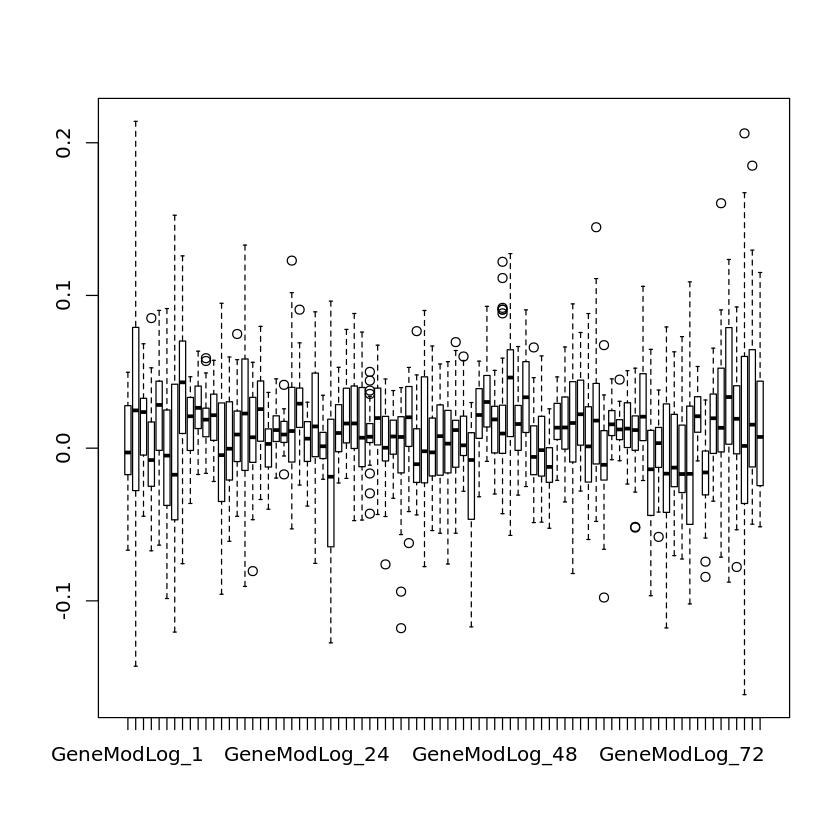

In [19]:
boxplot(allModuleAverageExps)

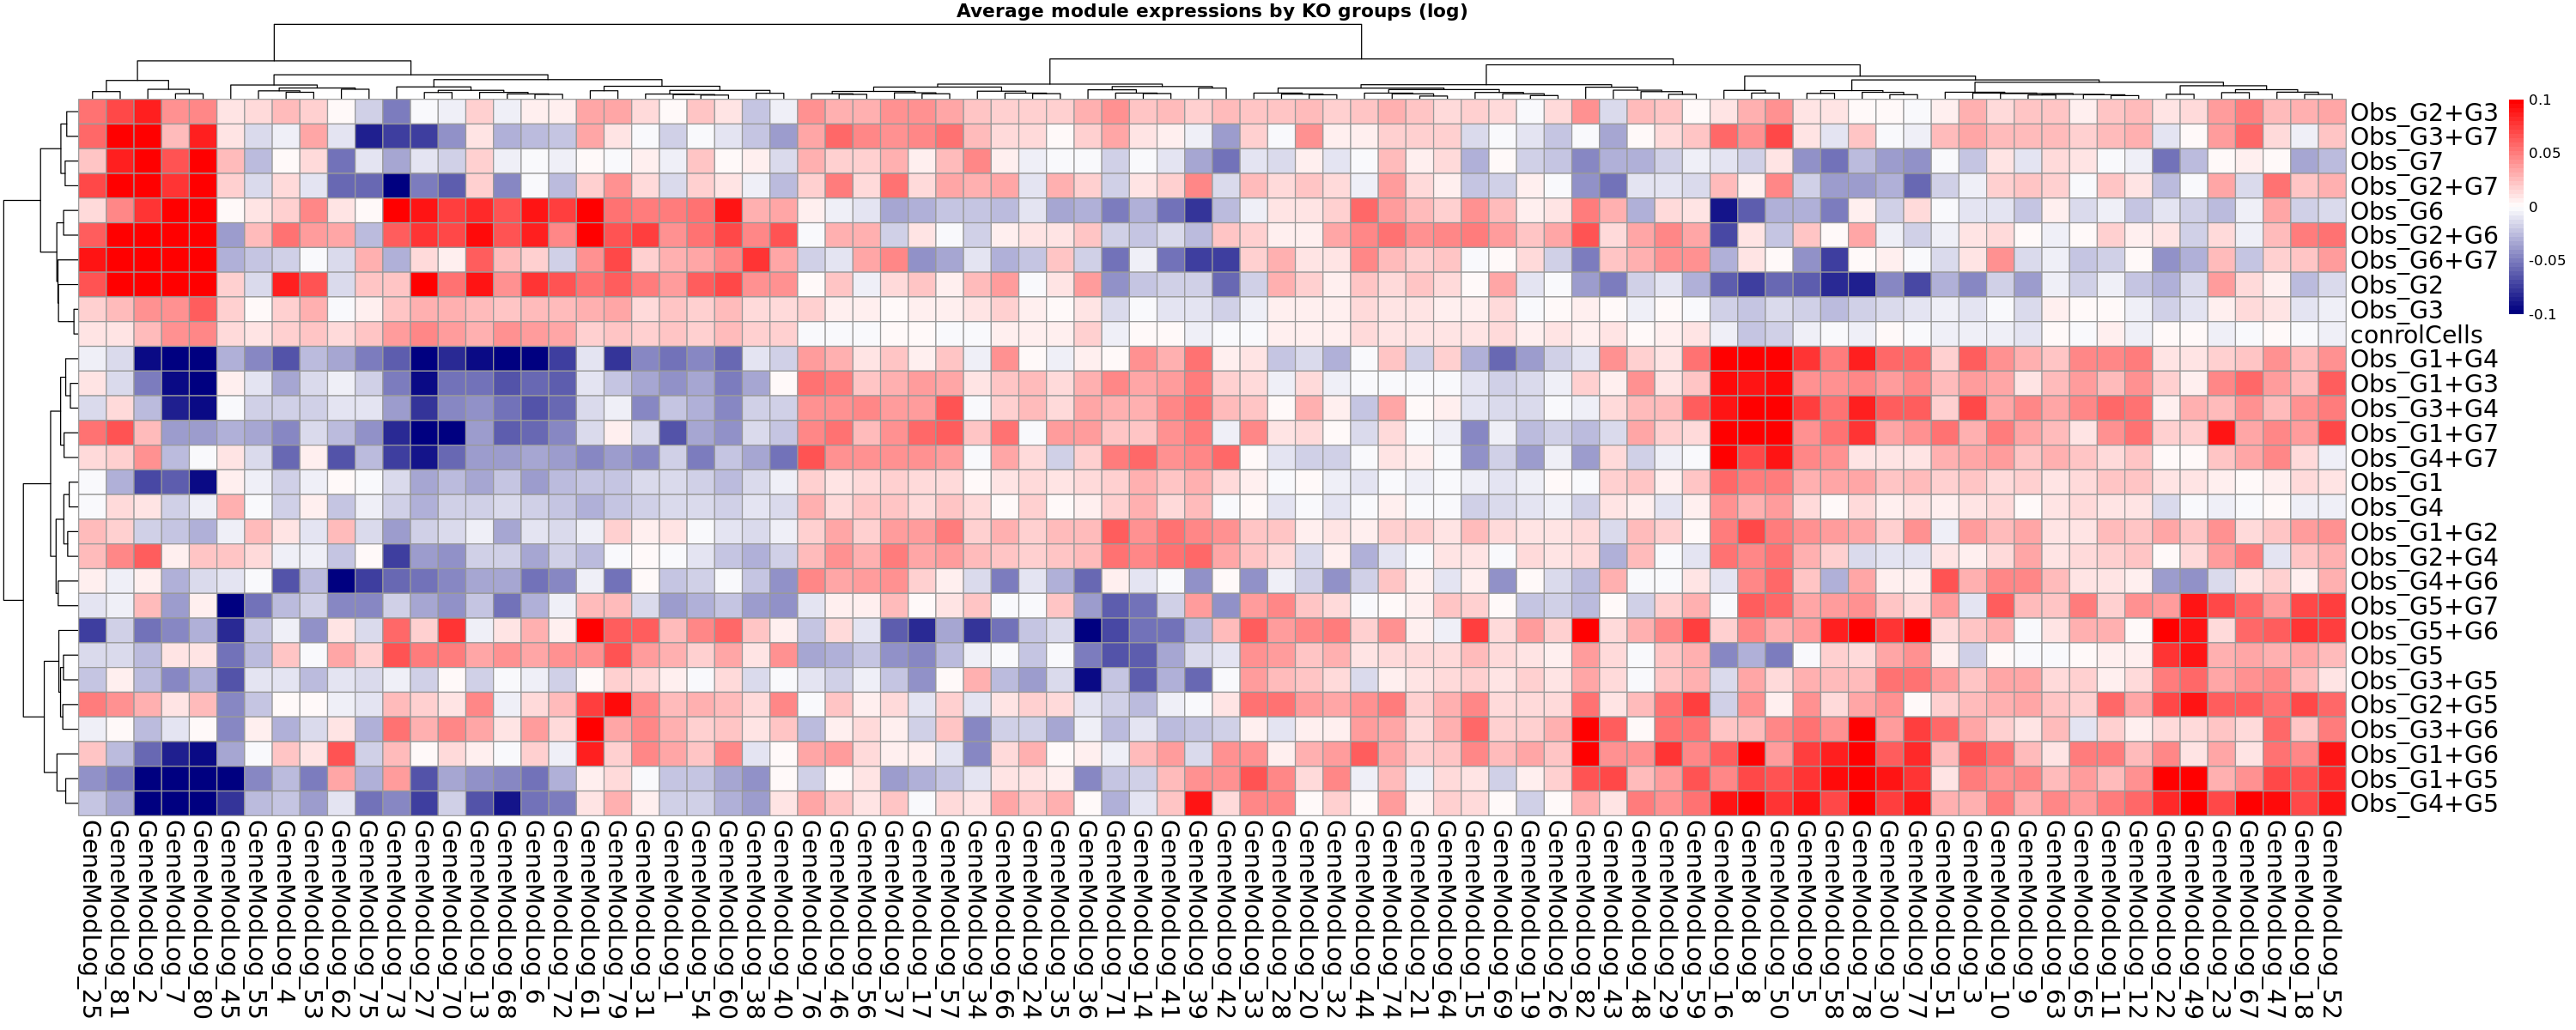

In [20]:
options(repr.plot.width=25, repr.plot.height=10)
plotTmp = allModuleAverageExps
plotTmp[plotTmp > 0.1] = 0.1
plotTmp[plotTmp < -0.1] = -0.1

pheatmap(plotTmp, color = colorRampPalette(c("navy", "white", "red"))(50),
         main=("Average module expressions by KO groups (log)"),
          clustering_method="ward.D2", 
                clustering_distance_rows="euclidean",
                clustering_distance_cols="euclidean" ,  fontsize_row=17, fontsize_col=17)

In [21]:
coefsAll <- coefsAll[rownames(coefsAll) %ni% c("n_genes", "mt_frac", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9"),]
pValsAll <- pValsAll[rownames(pValsAll) %ni% c("n_genes", "mt_frac", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9"),]

In [22]:
head(coefsAll)

,GeneModLog_1,GeneModLog_2,GeneModLog_3,GeneModLog_4,GeneModLog_5,GeneModLog_6,GeneModLog_7,GeneModLog_8,GeneModLog_9,GeneModLog_10,⋯,GeneModLog_73,GeneModLog_74,GeneModLog_75,GeneModLog_76,GeneModLog_77,GeneModLog_78,GeneModLog_79,GeneModLog_80,GeneModLog_81,GeneModLog_82
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
const,-0.395221479,0.170391199,-0.359295227,-0.220686475,-0.53107628,-0.4251232620,0.010930242,-0.4648042307,-0.2825806052,-0.273404425,⋯,-0.50879168,-0.3048022616,-0.2873438649,-0.124290539,-0.579781985,-0.655080238,-0.35640401,0.12870743,-0.11321285,-0.572312895
G1,-0.020491686,-0.081884873,0.025565208,-0.019771088,0.03186104,-0.0530992785,-0.081687302,0.0649324721,0.0276935334,0.021252522,⋯,-0.04039344,-0.0002245789,-0.0108889043,0.015533191,0.019392301,0.030402117,-0.03053868,-0.11650517,-0.03427473,-0.014895233
G2,0.002388379,0.132196827,-0.036874563,0.055301826,-0.05506039,0.0264618475,0.097700446,-0.0513440036,-0.0249275510,-0.013906077,⋯,-0.02761861,-0.0031081405,-0.0060259414,0.009000546,-0.064351090,-0.075905369,0.02685745,0.14904837,0.08591146,-0.040422194
G3,0.001621806,0.021083816,-0.002371536,0.001659854,-0.01183995,-0.0068860279,0.004343636,-0.0005682582,-0.0009101014,0.005650808,⋯,-0.01437454,0.0017268208,-0.0143729620,0.022452849,-0.004791509,-0.009054163,0.01422338,0.01961945,0.02039543,0.002574672
G4,-0.018379115,0.000313225,0.013826424,-0.020099369,0.01691909,-0.0344056266,-0.036292161,0.0464363349,0.0156470505,0.021829330,⋯,-0.04321314,0.0052412014,-0.0179898082,0.028212713,0.003926054,0.012150533,-0.03058357,-0.02985347,0.01533768,-0.026227322
G5,0.007368263,-0.045182915,-0.020577122,0.012239506,0.00315467,0.0003556339,-0.026420984,-0.0145190890,0.0109571526,0.004042725,⋯,0.02511511,0.0004206013,0.0004111068,-0.044859373,0.035682257,0.007124110,0.03989455,-0.03151357,-0.02872669,0.031539200


In [23]:
rownames(coefsAll) == rownames(pValsAll)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [24]:
coefsAllSum = coefsAll

In [25]:
head(coefsAllSum)

,GeneModLog_1,GeneModLog_2,GeneModLog_3,GeneModLog_4,GeneModLog_5,GeneModLog_6,GeneModLog_7,GeneModLog_8,GeneModLog_9,GeneModLog_10,⋯,GeneModLog_73,GeneModLog_74,GeneModLog_75,GeneModLog_76,GeneModLog_77,GeneModLog_78,GeneModLog_79,GeneModLog_80,GeneModLog_81,GeneModLog_82
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
const,-0.395221479,0.170391199,-0.359295227,-0.220686475,-0.53107628,-0.4251232620,0.010930242,-0.4648042307,-0.2825806052,-0.273404425,⋯,-0.50879168,-0.3048022616,-0.2873438649,-0.124290539,-0.579781985,-0.655080238,-0.35640401,0.12870743,-0.11321285,-0.572312895
G1,-0.020491686,-0.081884873,0.025565208,-0.019771088,0.03186104,-0.0530992785,-0.081687302,0.0649324721,0.0276935334,0.021252522,⋯,-0.04039344,-0.0002245789,-0.0108889043,0.015533191,0.019392301,0.030402117,-0.03053868,-0.11650517,-0.03427473,-0.014895233
G2,0.002388379,0.132196827,-0.036874563,0.055301826,-0.05506039,0.0264618475,0.097700446,-0.0513440036,-0.0249275510,-0.013906077,⋯,-0.02761861,-0.0031081405,-0.0060259414,0.009000546,-0.064351090,-0.075905369,0.02685745,0.14904837,0.08591146,-0.040422194
G3,0.001621806,0.021083816,-0.002371536,0.001659854,-0.01183995,-0.0068860279,0.004343636,-0.0005682582,-0.0009101014,0.005650808,⋯,-0.01437454,0.0017268208,-0.0143729620,0.022452849,-0.004791509,-0.009054163,0.01422338,0.01961945,0.02039543,0.002574672
G4,-0.018379115,0.000313225,0.013826424,-0.020099369,0.01691909,-0.0344056266,-0.036292161,0.0464363349,0.0156470505,0.021829330,⋯,-0.04321314,0.0052412014,-0.0179898082,0.028212713,0.003926054,0.012150533,-0.03058357,-0.02985347,0.01533768,-0.026227322
G5,0.007368263,-0.045182915,-0.020577122,0.012239506,0.00315467,0.0003556339,-0.026420984,-0.0145190890,0.0109571526,0.004042725,⋯,0.02511511,0.0004206013,0.0004111068,-0.044859373,0.035682257,0.007124110,0.03989455,-0.03151357,-0.02872669,0.031539200


In [26]:
dim(coefsAllSum)

[1] 29 82

In [27]:
for(i in c("G1","G2","G3","G4","G5", "G6", "G7" )){
    for(j in c("G1","G2","G3","G4","G5", "G6", "G7" )){
        if( i != j & (paste0(i,"*",j) %in% rownames(coefsAllSum))){
        
           coefsAllSum[paste0("Pred_",i,"+",j),] <-   coefsAllSum[i,] + coefsAllSum[j,] + coefsAllSum[paste0(i,"*",j),]
        }else{
           coefsAllSum[paste0("Pred_",i),] <-  coefsAllSum[i,]
        }
    }
}

In [28]:
predCols = rownames(coefsAllSum)[grep("Pred",rownames(coefsAllSum))]

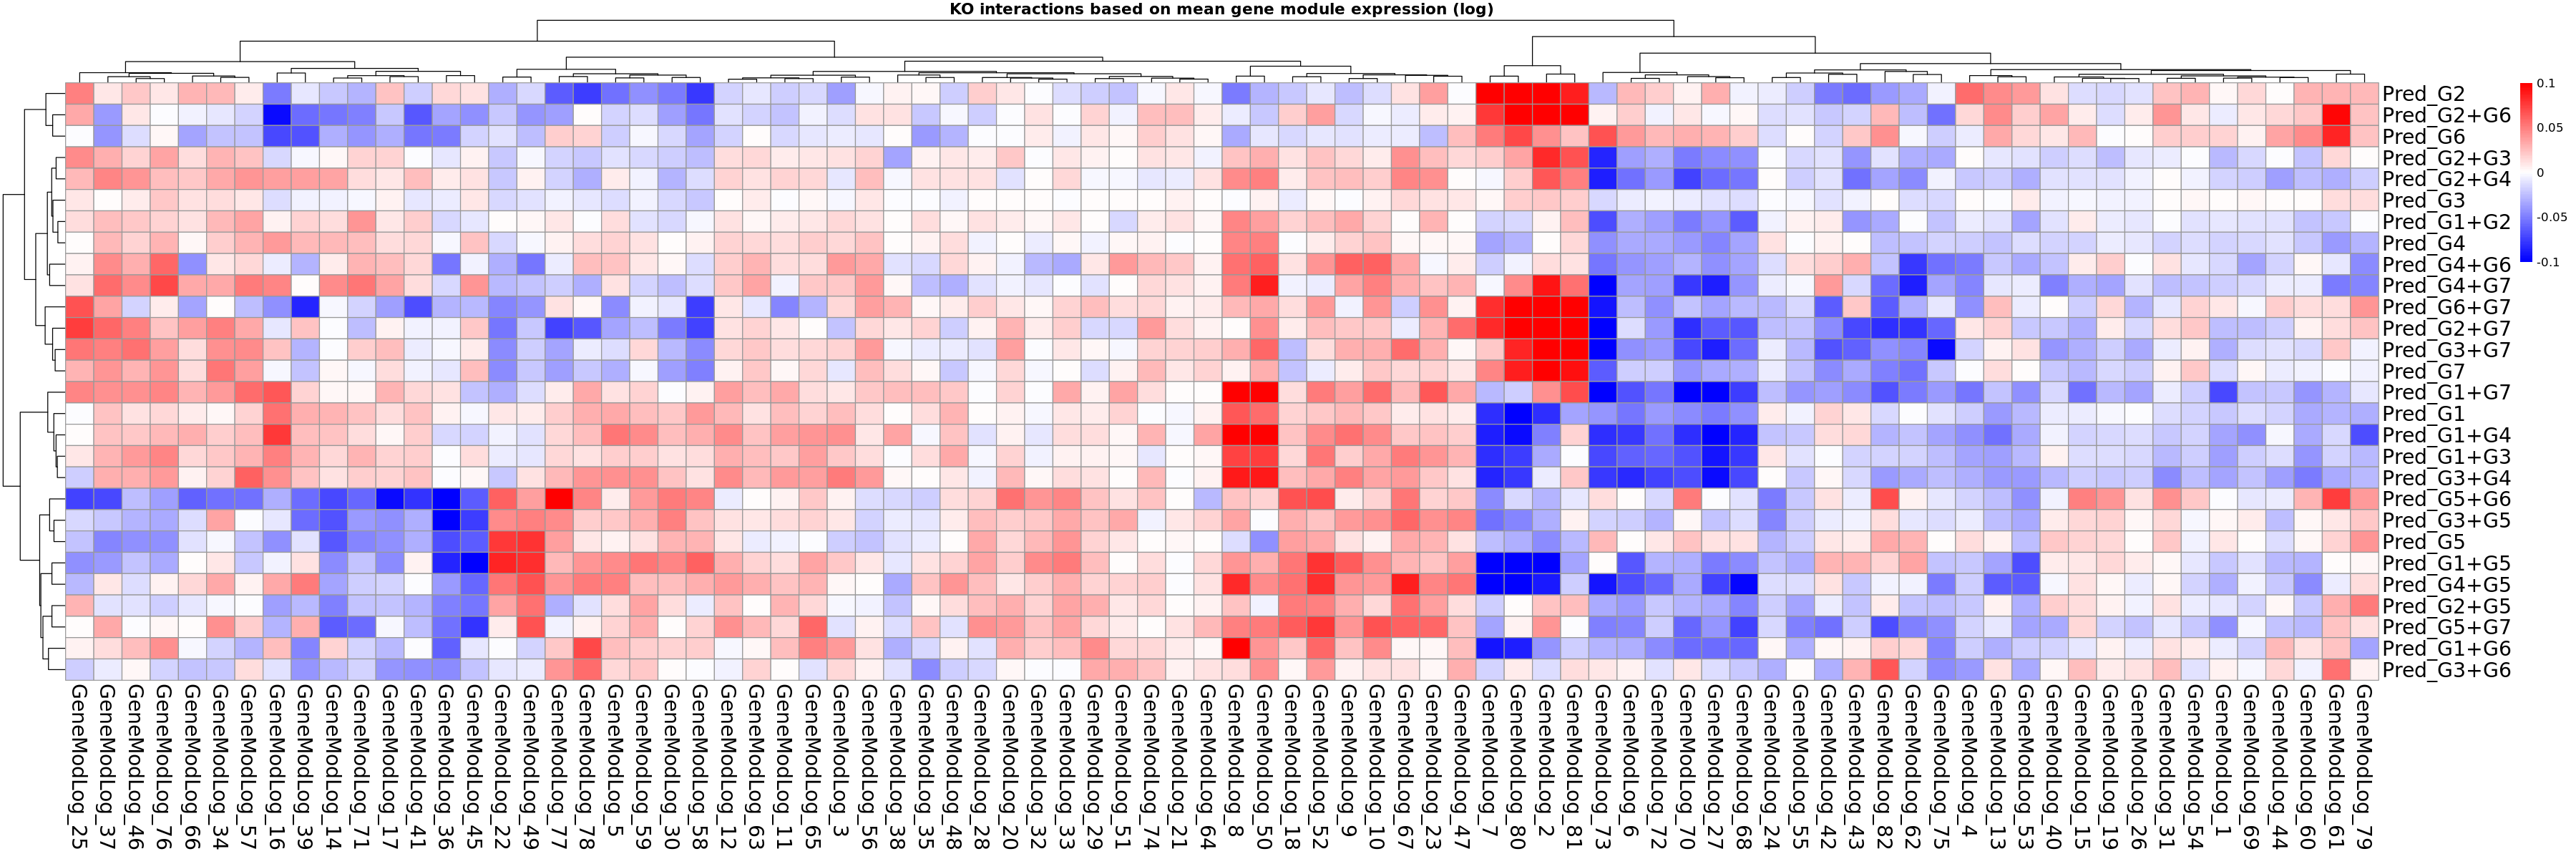

In [29]:
options(repr.plot.width=30, repr.plot.height=10)

plotTmp = coefsAllSum[predCols,]

plotTmp = as.data.frame(t(apply(plotTmp, 1 , function(x){x-mean(x, na.rm = TRUE)})))

plotTmp[plotTmp > 0.1] = 0.1
plotTmp[plotTmp < -0.1] = -0.1

pheatmap(plotTmp,
         colorRampPalette(c("blue", "white", "red"))(100),
         main=("KO interactions based on mean gene module expression (log)"),
          clustering_method="ward.D2", 
                clustering_distance_rows="euclidean",
                clustering_distance_cols="euclidean" , cluster_rows=TRUE, fontsize_row=17, fontsize_col=17)

In [30]:
predAndAct = rbind(allModuleAverageExps, coefsAllSum)

In [31]:
rownames(predAndAct)

[1] "Obs_G1"      "Obs_G2"      "Obs_G3"      "Obs_G4"      "Obs_G5"     
 [6] "Obs_G6"      "Obs_G7"      "Obs_G1+G2"   "Obs_G1+G3"   "Obs_G1+G4"  
[11] "Obs_G1+G5"   "Obs_G1+G6"   "Obs_G1+G7"   "Obs_G2+G3"   "Obs_G2+G4"  
[16] "Obs_G2+G5"   "Obs_G2+G6"   "Obs_G2+G7"   "Obs_G3+G4"   "Obs_G3+G5"  
[21] "Obs_G3+G6"   "Obs_G3+G7"   "Obs_G4+G5"   "Obs_G4+G6"   "Obs_G4+G7"  
[26] "Obs_G5+G6"   "Obs_G5+G7"   "Obs_G6+G7"   "conrolCells" "const"      
[31] "G1"          "G2"          "G3"          "G4"          "G5"         
[36] "G6"          "G7"          "G1*G2"       "G1*G3"       "G1*G4"      
[41] "G1*G5"       "G1*G6"       "G1*G7"       "G2*G3"       "G2*G4"      
[46] "G2*G5"       "G2*G6"       "G2*G7"       "G3*G4"       "G3*G5"      
[51] "G3*G6"       "G3*G7"       "G4*G5"       "G4*G6"       "G4*G7"      
[56] "G5*G6"       "G5*G7"       "G6*G7"       "Pred_G1"     "Pred_G1+G2" 
[61] "Pred_G1+G3"  "Pred_G1+G4"  "Pred_G1+G5"  "Pred_G1+G6"  "Pred_G1+G7" 
[66] "Pred_G2"     "Pred_G2+G3"  "Pred_G2+G4"  "Pred_G2+G5"  "Pred_G2+G6" 
[71] "Pred_G2+G7"  "Pred_G3"     "Pred_G3+G4"  "Pred_G3+G5"  "Pred_G3+G6" 
[76] "Pred_G3+G7"  "Pred_G4"     "Pred_G4+G5"  "Pred_G4+G6"  "Pred_G4+G7" 
[81] "Pred_G5"     "Pred_G5+G6"  "Pred_G5+G7"  "Pred_G6"     "Pred_G6+G7" 
[86] "Pred_G7"

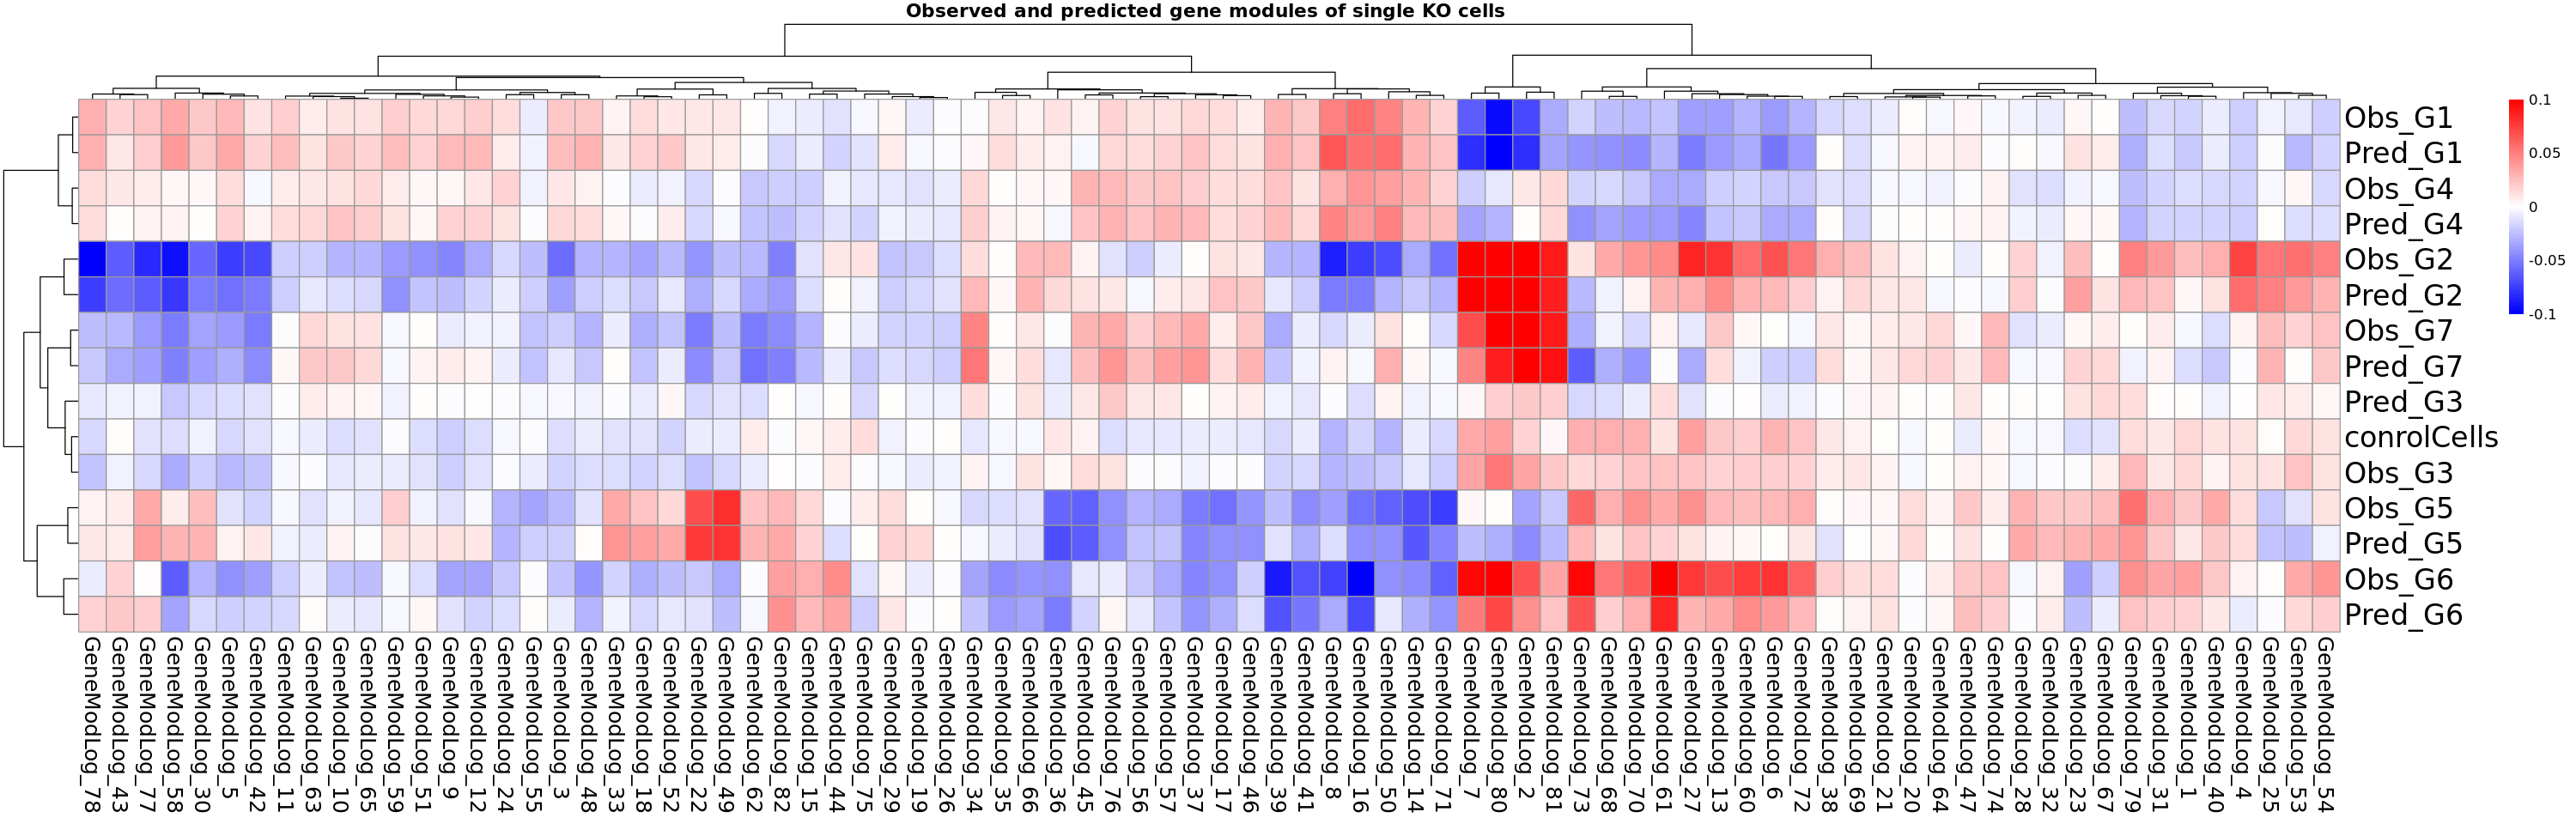

In [32]:
options(repr.plot.width=25, repr.plot.height=8)
plotTmp = predAndAct[c("conrolCells","Obs_G1", "Pred_G1","Obs_G2", "Pred_G2","Obs_G3",
                      "Pred_G3","Obs_G4", "Pred_G4", "Obs_G5", "Pred_G5", "Obs_G6", "Pred_G6", "Obs_G7", "Pred_G7"),]
plotTmp = t(apply(plotTmp, 1 , function(x){x-mean(x, na.rm = TRUE)}))

plotTmp[plotTmp > 0.1] = 0.1
plotTmp[plotTmp < -0.1] = -0.1
pheatmap(plotTmp , color = colorRampPalette(c("blue", "white", "red"))(100),
         main=("Observed and predicted gene modules of single KO cells "),
          clustering_method="ward.D2", 
                clustering_distance_rows="euclidean",
                clustering_distance_cols="euclidean" , cluster_rows=TRUE, fontsize_row=20, fontsize_col=15)

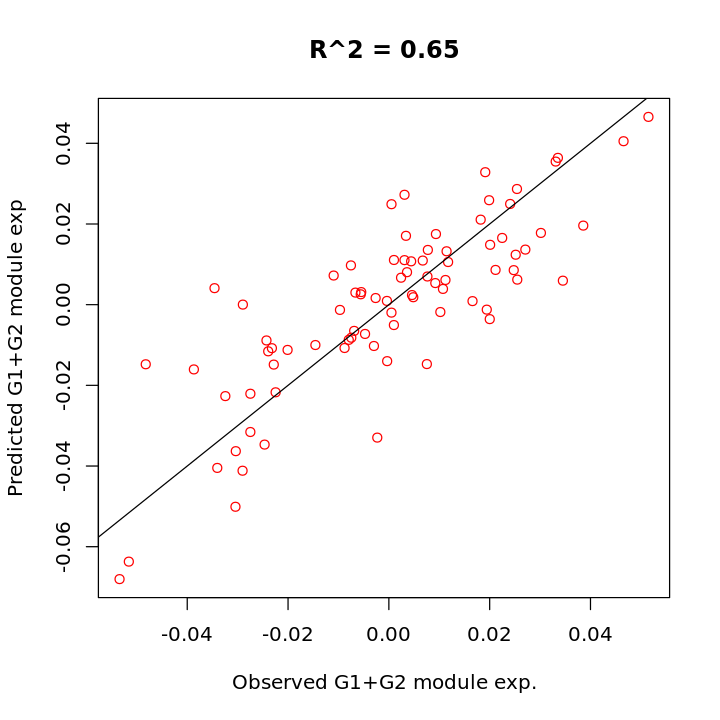

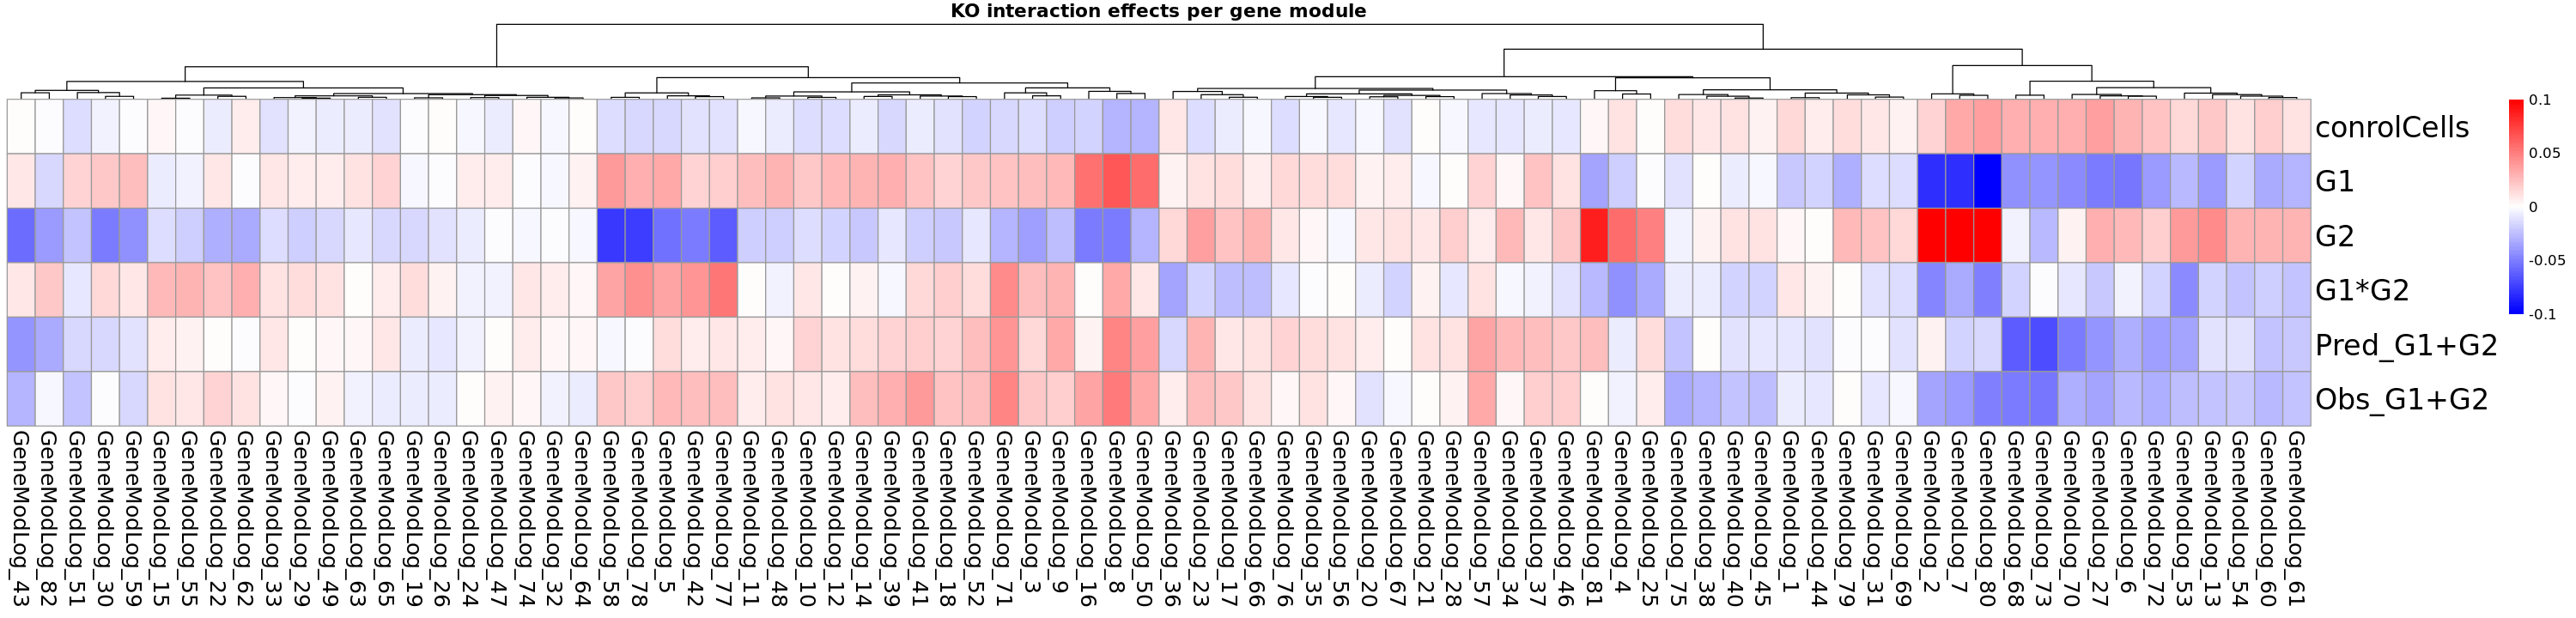

In [33]:
options(repr.plot.width=6, repr.plot.height=6)
plotTmp = predAndAct[c("conrolCells","G1", "G2", "G1*G2", 'Pred_G1+G2', 'Obs_G1+G2'),]

plotTmp = as.data.frame((apply(plotTmp, 1 , function(x){x-mean(x, na.rm = TRUE)})))

myR2 = round(computeR2(as.vector(plotTmp[,'Obs_G1+G2']), as.vector(plotTmp[,'Pred_G1+G2'])), digits = 2)



plot(plotTmp[,'Obs_G1+G2'], plotTmp[,'Pred_G1+G2'], xlab="Observed G1+G2 module exp.", ylab="Predicted G1+G2 module exp", col="red",
     main = paste0("R^2 = ", myR2))
abline(0,1)



options(repr.plot.width=25, repr.plot.height=6)

plotTmp[plotTmp > 0.1] = 0.1
plotTmp[plotTmp < -0.1] = -0.1

pheatmap(t(plotTmp), color = colorRampPalette(c("blue", "white", "red"))(100),
         main=("KO interaction effects per gene module"),
          clustering_method="ward.D2", 
                clustering_distance_rows="euclidean",
                clustering_distance_cols="euclidean" , cluster_rows=FALSE, fontsize_row=20, fontsize_col=15)


In [45]:
predAndAct

,GeneModLog_1,GeneModLog_2,GeneModLog_3,GeneModLog_4,GeneModLog_5,GeneModLog_6,GeneModLog_7,GeneModLog_8,GeneModLog_9,GeneModLog_10,⋯,GeneModLog_73,GeneModLog_74,GeneModLog_75,GeneModLog_76,GeneModLog_77,GeneModLog_78,GeneModLog_79,GeneModLog_80,GeneModLog_81,GeneModLog_82
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Obs_G1,-0.014594054,-0.069912304,0.023125809,-0.016787054,0.029891407,-0.0374879810,-0.061548466,0.051018864,0.016098900,0.012068772,⋯,-0.015731907,-0.0001487286,-0.0018594114,0.0181649617,0.0252261270,0.033483171,-2.334860e-02,-0.092467739,-0.0316621061,-0.003470447
Obs_G2,0.037336210,0.162131190,-0.044592495,0.085180828,-0.063485291,0.0778250319,0.152523210,-0.075647400,-0.036218240,-0.017257391,⋯,0.022202809,0.0135402819,0.0218271119,0.0014443224,-0.0713496095,-0.087728706,6.083739e-02,0.206132797,0.1013489804,-0.036489336
Obs_G3,0.021018625,0.042074073,-0.010100501,0.017151417,-0.019716374,0.0250043350,0.041861799,-0.022584245,-0.013418447,-0.002118573,⋯,0.022422209,0.0085365471,0.0044374595,0.0166952195,-0.0089339101,-0.017358761,3.290325e-02,0.060082824,0.0273867688,0.006604698
Obs_G4,-0.012310267,0.009990220,0.010013340,-0.016742870,0.013974046,-0.0190283541,-0.017384684,0.031788767,0.003113050,0.012834920,⋯,-0.016028659,0.0055214127,-0.0072105873,0.0283868021,0.0089498968,0.014645381,-2.384626e-02,-0.007775304,0.0153706684,-0.016949618
Obs_G5,0.030043615,-0.025494717,-0.018892950,0.021513342,-0.001456255,0.0359545915,0.011484729,-0.028979220,-0.001575718,0.003011717,⋯,0.067631437,0.0158857610,0.0160827476,-0.0347192921,0.0423236414,0.013240924,6.405208e-02,0.010198288,-0.0132717033,0.036022218
Obs_G6,0.049694519,0.079096525,-0.011664922,0.018245364,-0.030494702,0.0914186208,0.108772577,-0.060249262,-0.021896503,-0.009949667,⋯,0.108899786,0.0360350529,0.0009454664,0.0048675637,0.0133160547,0.004545874,5.478699e-02,0.135179544,0.0474058768,0.049557111
Obs_G7,-0.005743037,0.117354792,-0.020896360,0.003071724,-0.040302801,-0.0010444033,0.066508115,-0.016674273,-0.009652304,0.008542748,⋯,-0.032777440,0.0246098051,-0.0082046192,0.0319570734,-0.0415904653,-0.027096919,-4.716413e-05,0.108804489,0.0875266533,-0.047323260
Obs_G1+G2,0.009079374,-0.018054488,0.036624281,0.011806909,0.043609934,-0.0109442559,-0.022150442,0.068031146,0.035655014,0.025871382,⋯,-0.036894380,0.0189518703,-0.0159077807,0.0199261700,0.0413070665,0.035956632,1.704822e-02,-0.031698582,0.0170561103,0.014235564
Obs_G1+G3,-0.040401248,-0.051162891,0.037101134,-0.035432930,0.043857680,-0.0595396732,-0.094246620,0.091718600,0.011531082,0.032628730,⋯,-0.049128987,-0.0024731147,-0.0179693209,0.0557601151,0.0453666891,0.047347529,-2.193898e-02,-0.096226402,-0.0142961497,0.018758884


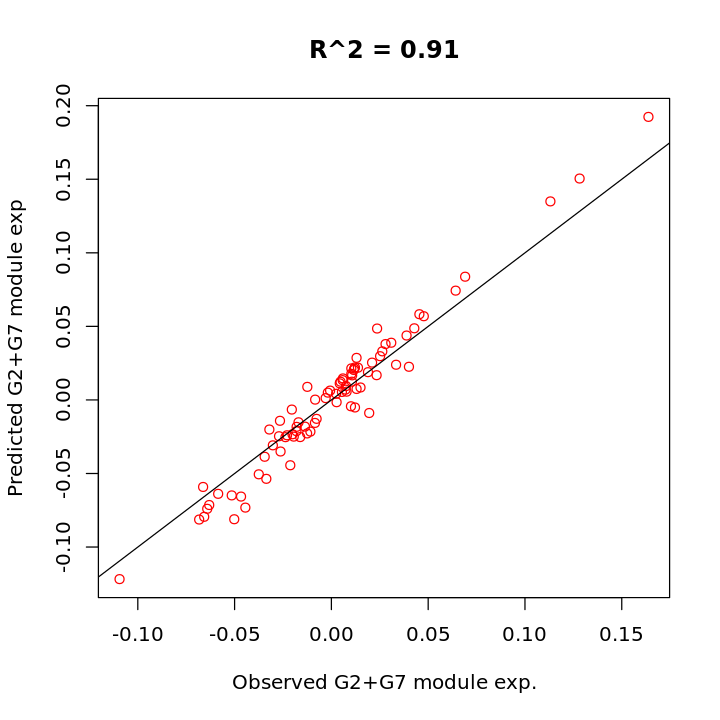

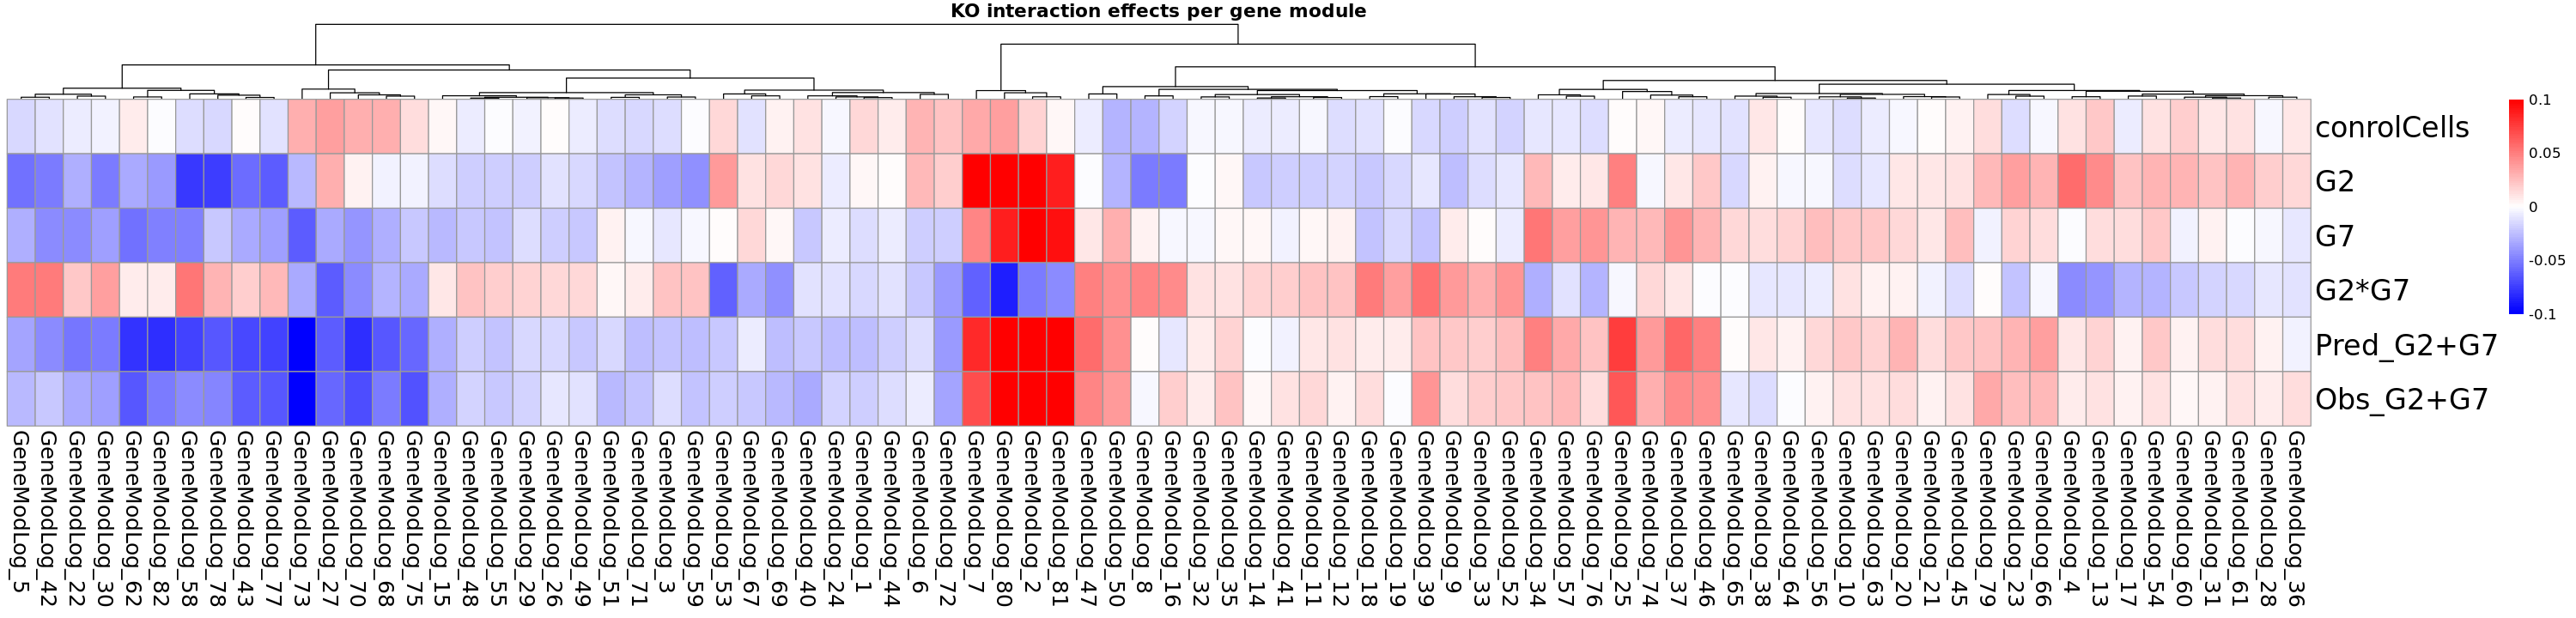

In [46]:
options(repr.plot.width=6, repr.plot.height=6)
plotTmp = predAndAct[c("conrolCells","G2", "G7", "G2*G7", 'Pred_G2+G7', 'Obs_G2+G7'),]

plotTmp = as.data.frame((apply(plotTmp, 1 , function(x){x-mean(x, na.rm = TRUE)})))

myR2 = round(computeR2(as.vector(plotTmp[,'Obs_G2+G7']), as.vector(plotTmp[,'Pred_G2+G7'])), digits = 2)



plot(plotTmp[,'Obs_G2+G7'], plotTmp[,'Pred_G2+G7'], xlab="Observed G2+G7 module exp.", ylab="Predicted G2+G7 module exp", col="red",
     main = paste0("R^2 = ", myR2))
abline(0,1)



options(repr.plot.width=25, repr.plot.height=6)

plotTmp[plotTmp > 0.1] = 0.1
plotTmp[plotTmp < -0.1] = -0.1

pheatmap(t(plotTmp), color = colorRampPalette(c("blue", "white", "red"))(100),
         main=("KO interaction effects per gene module"),
          clustering_method="ward.D2", 
                clustering_distance_rows="euclidean",
                clustering_distance_cols="euclidean" , cluster_rows=FALSE, fontsize_row=20, fontsize_col=15)


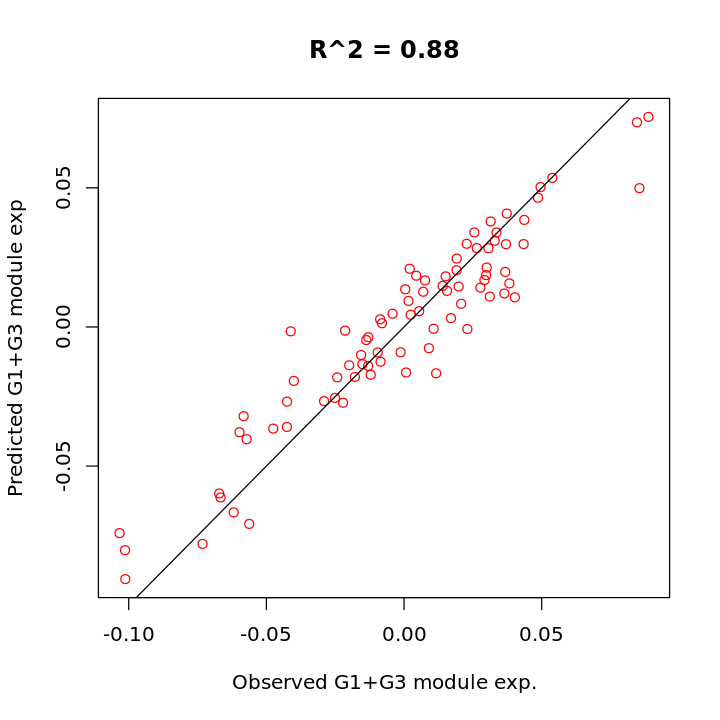

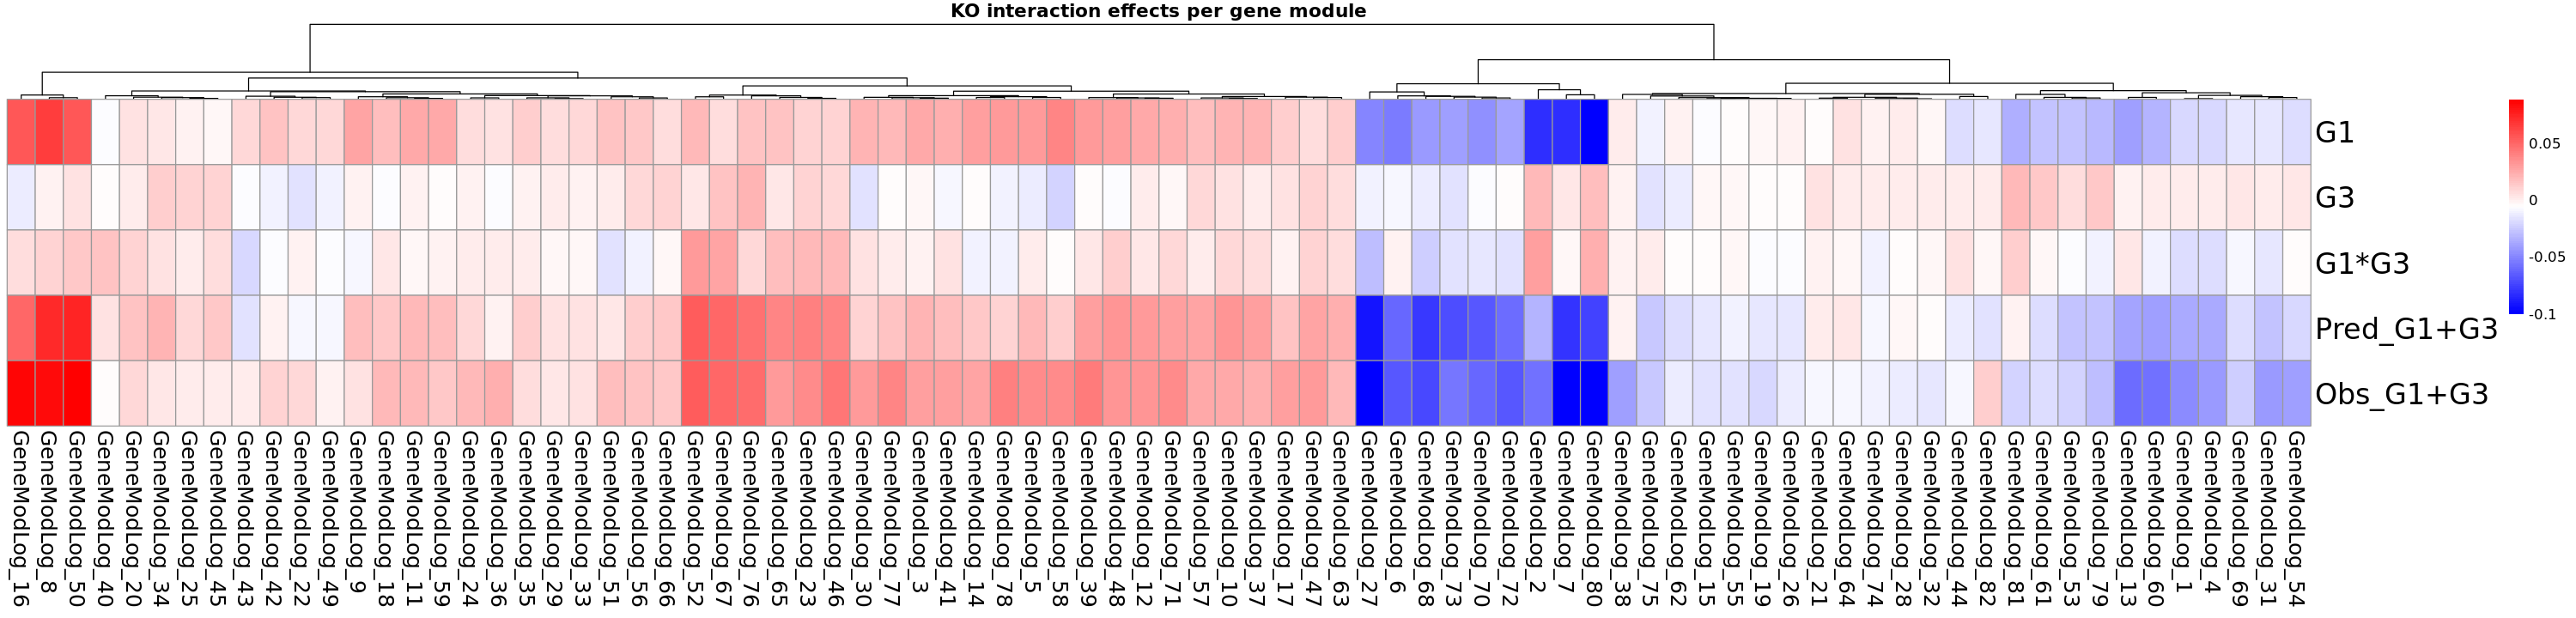

In [34]:
options(repr.plot.width=6, repr.plot.height=6)
plotTmp = predAndAct[c("G1", "G3", "G1*G3", 'Pred_G1+G3', 'Obs_G1+G3'),]
plotTmp = as.data.frame((apply(plotTmp, 1 , function(x){x-mean(x, na.rm = TRUE)})))

myR2 = round(computeR2(as.vector(plotTmp[,'Obs_G1+G3']), as.vector(plotTmp[,'Pred_G1+G3'])), digits = 2)

plot(plotTmp[,'Obs_G1+G3'], plotTmp[,'Pred_G1+G3'], xlab="Observed G1+G3 module exp.", ylab="Predicted G1+G3 module exp", col="red",
     main = paste0("R^2 = ", myR2))
abline(0,1)

options(repr.plot.width=25, repr.plot.height=6)

plotTmp[plotTmp > 0.1] = 0.1
plotTmp[plotTmp < -0.1] = -0.1

pheatmap(t(plotTmp), color = colorRampPalette(c("blue", "white", "red"))(100),
         main=("KO interaction effects per gene module"),
          clustering_method="ward.D2", 
                clustering_distance_rows="euclidean",
                clustering_distance_cols="euclidean" , cluster_rows=FALSE, fontsize_row=20, fontsize_col=15)



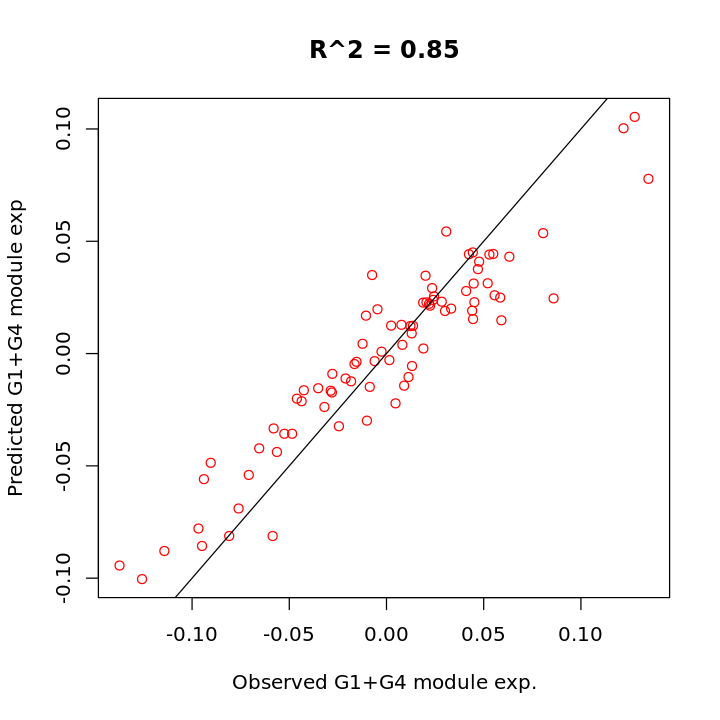

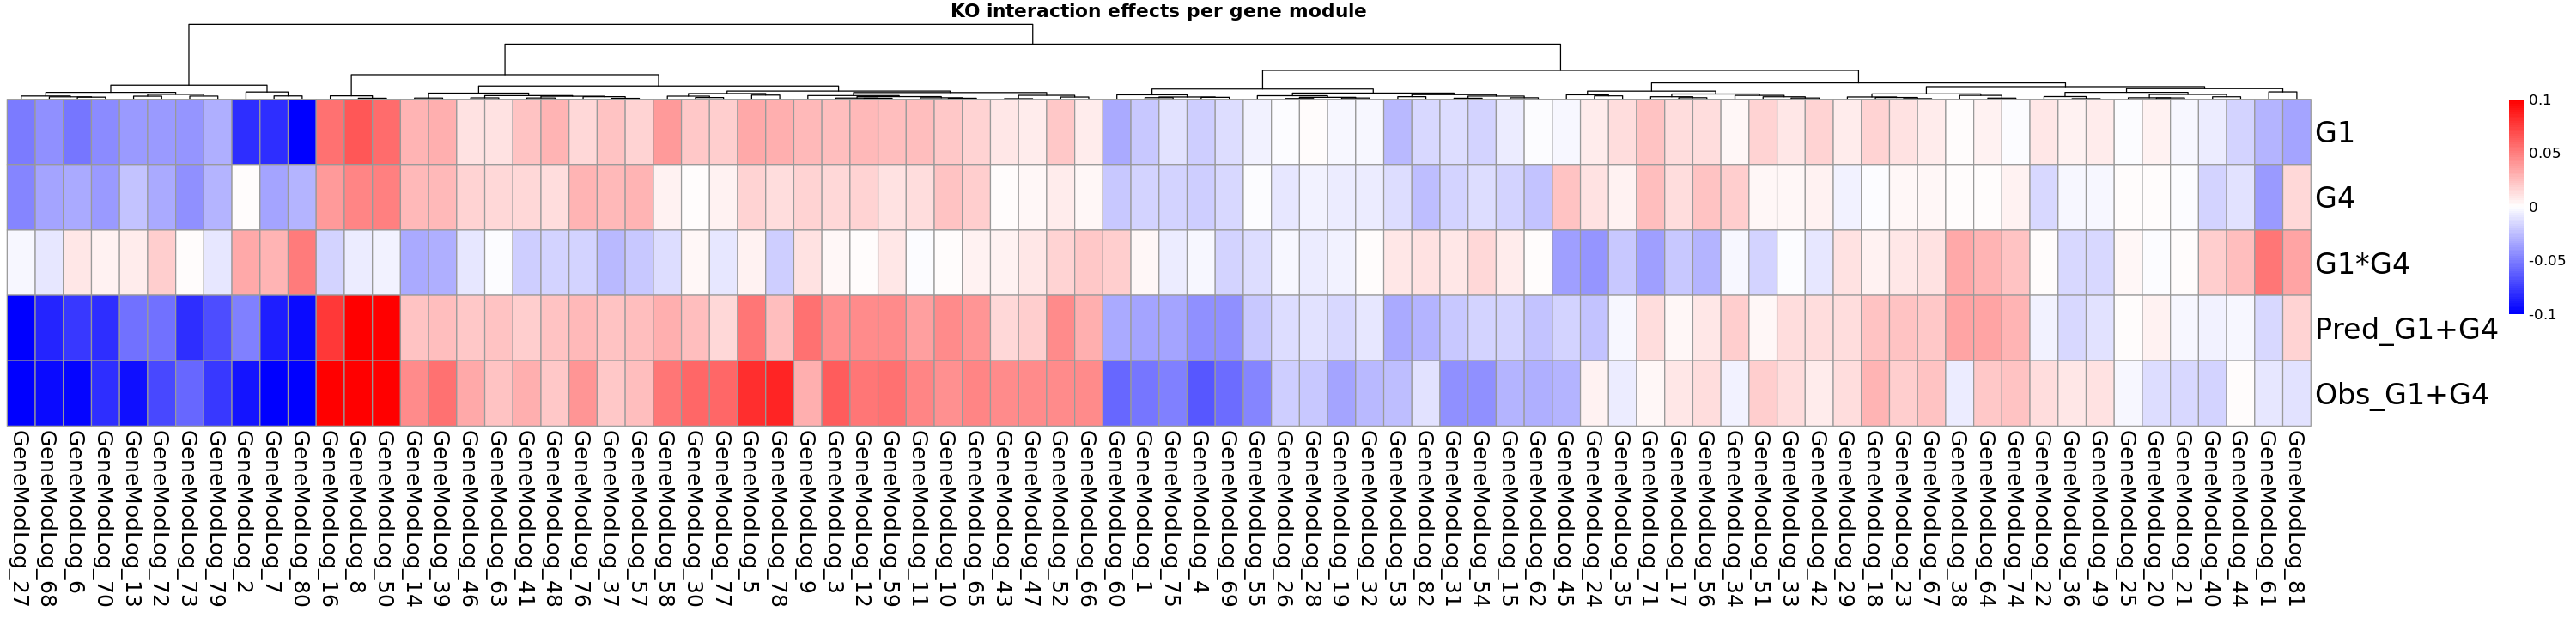

In [35]:
options(repr.plot.width=6, repr.plot.height=6)
plotTmp = predAndAct[c("G1", "G4", "G1*G4", 'Pred_G1+G4', 'Obs_G1+G4'),]
plotTmp = as.data.frame((apply(plotTmp, 1 , function(x){x-mean(x, na.rm = TRUE)})))

myR2 = round(computeR2(as.vector(plotTmp[,'Obs_G1+G4']), as.vector(plotTmp[,'Pred_G1+G4'])), digits = 2)

plot(plotTmp[,'Obs_G1+G4'], plotTmp[,'Pred_G1+G4'], xlab="Observed G1+G4 module exp.", ylab="Predicted G1+G4 module exp", col="red",
     main = paste0("R^2 = ", myR2))
abline(0,1)

options(repr.plot.width=25, repr.plot.height=6)

plotTmp[plotTmp > 0.1] = 0.1
plotTmp[plotTmp < -0.1] = -0.1

pheatmap(t(plotTmp), color = colorRampPalette(c("blue", "white", "red"))(100),
         main=("KO interaction effects per gene module"),
          clustering_method="ward.D2", 
                clustering_distance_rows="euclidean",
                clustering_distance_cols="euclidean" , cluster_rows=FALSE, fontsize_row=20, fontsize_col=15)



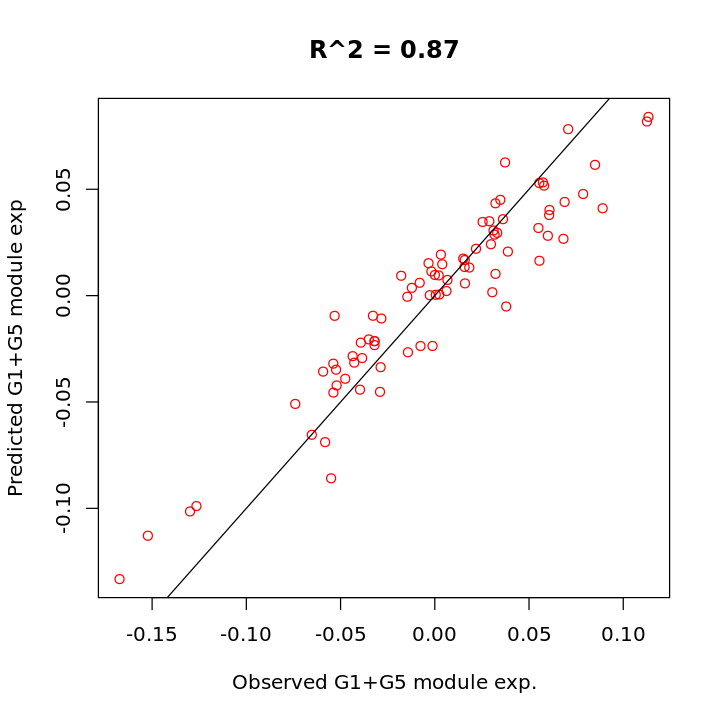

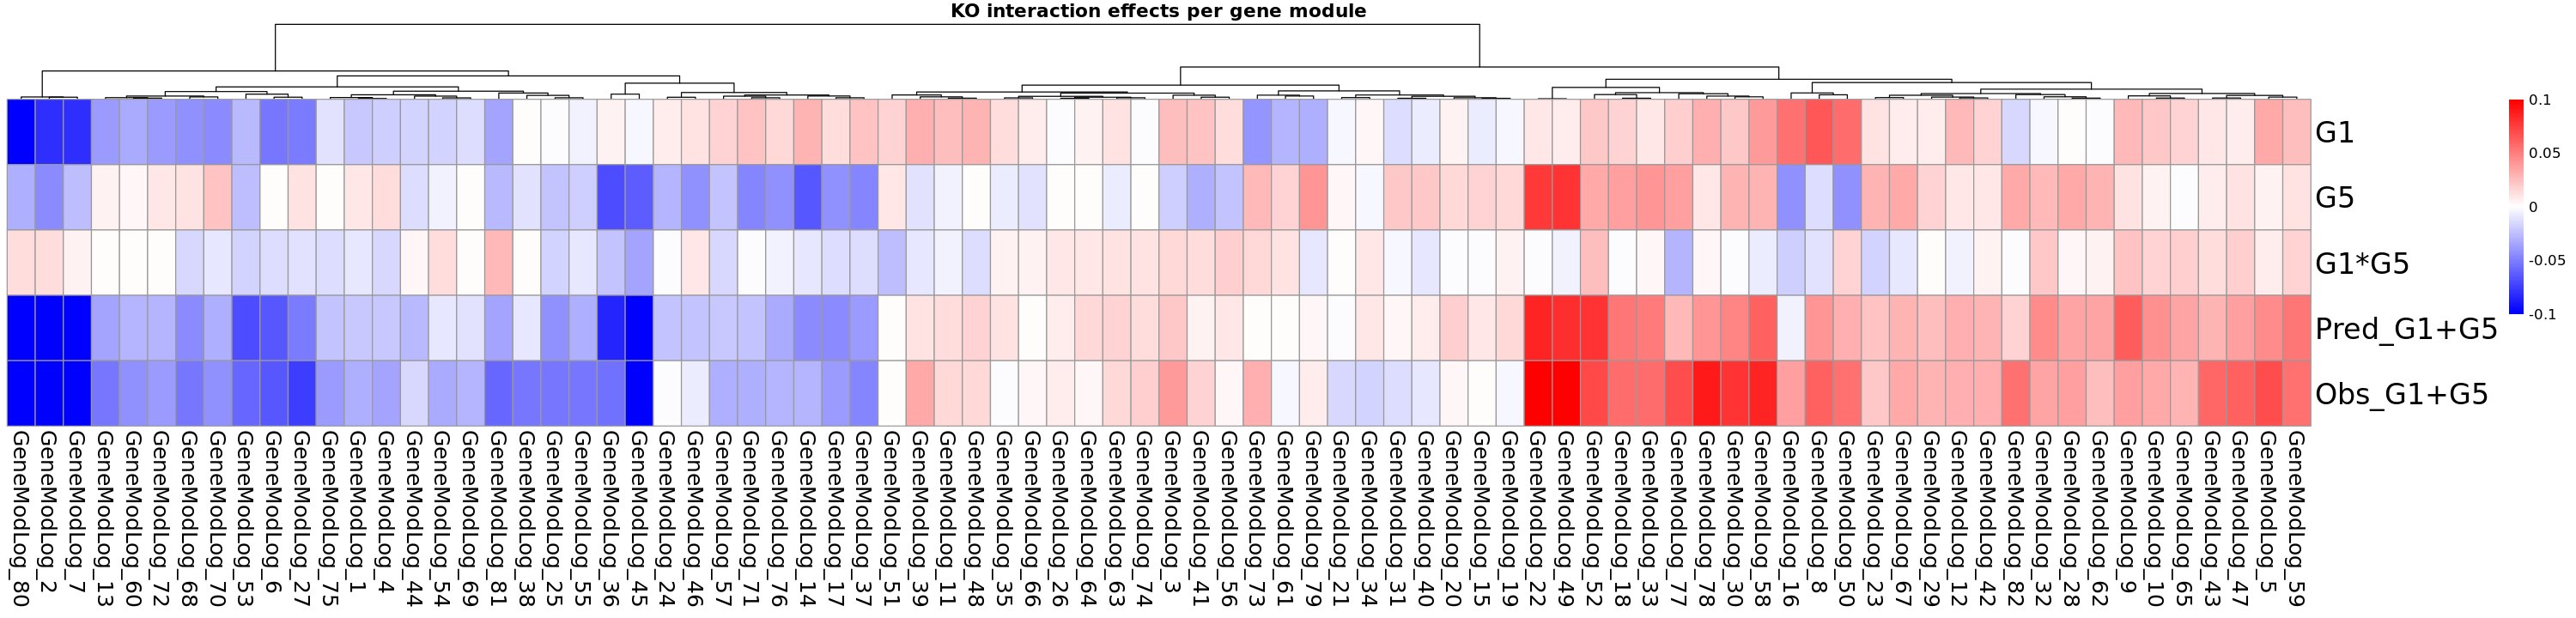

In [36]:
options(repr.plot.width=6, repr.plot.height=6)
plotTmp = predAndAct[c("G1", "G5", "G1*G5", 'Pred_G1+G5', 'Obs_G1+G5'),]
plotTmp = as.data.frame((apply(plotTmp, 1 , function(x){x-mean(x, na.rm = TRUE)})))

myR2 = round(computeR2(as.vector(plotTmp[,'Obs_G1+G5']), as.vector(plotTmp[,'Pred_G1+G5'])), digits = 2)

plot(plotTmp[,'Obs_G1+G5'], plotTmp[,'Pred_G1+G5'], xlab="Observed G1+G5 module exp.", ylab="Predicted G1+G5 module exp", col="red",
     main = paste0("R^2 = ", myR2))
abline(0,1)

options(repr.plot.width=25, repr.plot.height=6)

plotTmp[plotTmp > 0.1] = 0.1
plotTmp[plotTmp < -0.1] = -0.1

pheatmap(t(plotTmp), color = colorRampPalette(c("blue", "white", "red"))(100),
         main=("KO interaction effects per gene module"),
          clustering_method="ward.D2", 
                clustering_distance_rows="euclidean",
                clustering_distance_cols="euclidean" , cluster_rows=FALSE, fontsize_row=20, fontsize_col=15)



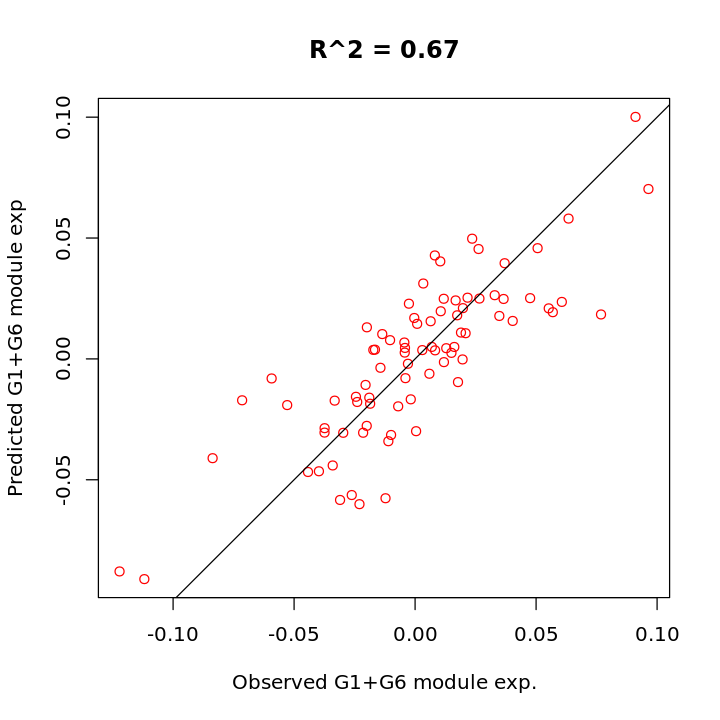

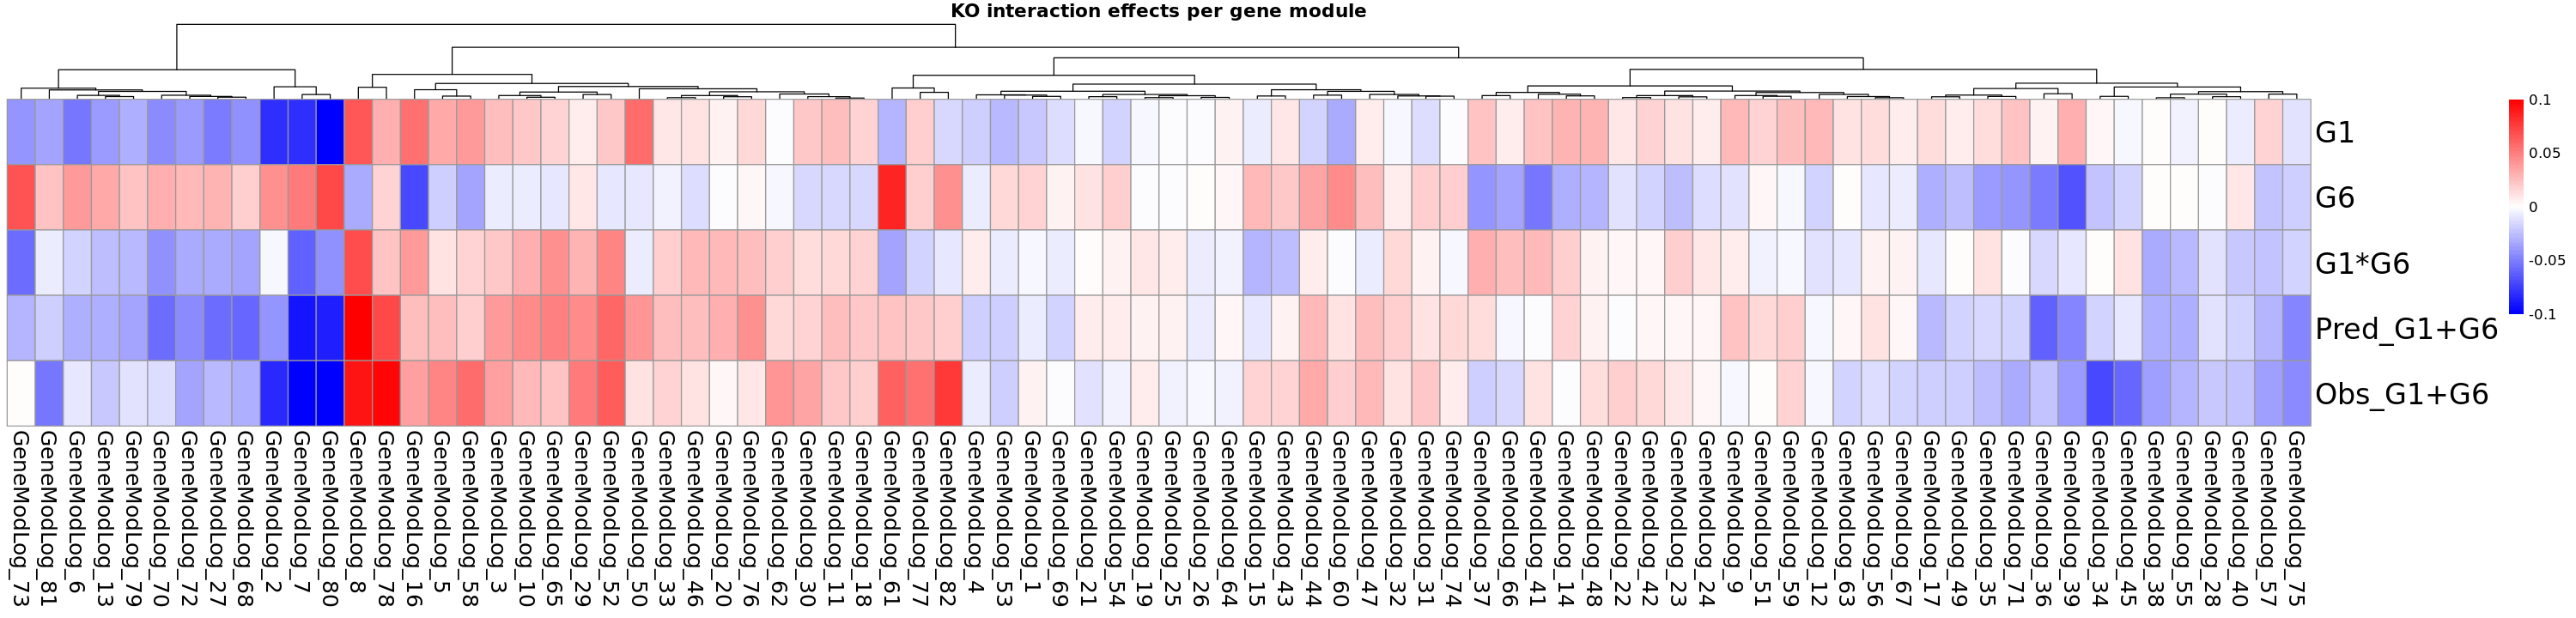

In [37]:
options(repr.plot.width=6, repr.plot.height=6)
plotTmp = predAndAct[c("G1", "G6", "G1*G6", 'Pred_G1+G6', 'Obs_G1+G6'),]
plotTmp = as.data.frame((apply(plotTmp, 1 , function(x){x-mean(x, na.rm = TRUE)})))

myR2 = round(computeR2(as.vector(plotTmp[,'Obs_G1+G6']), as.vector(plotTmp[,'Pred_G1+G6'])), digits = 2)

plot(plotTmp[,'Obs_G1+G6'], plotTmp[,'Pred_G1+G6'], xlab="Observed G1+G6 module exp.", ylab="Predicted G1+G6 module exp", col="red",
     main = paste0("R^2 = ", myR2))
abline(0,1)

options(repr.plot.width=25, repr.plot.height=6)

plotTmp[plotTmp > 0.1] = 0.1
plotTmp[plotTmp < -0.1] = -0.1

pheatmap(t(plotTmp), color = colorRampPalette(c("blue", "white", "red"))(100),
         main=("KO interaction effects per gene module"),
          clustering_method="ward.D2", 
                clustering_distance_rows="euclidean",
                clustering_distance_cols="euclidean" , cluster_rows=FALSE, fontsize_row=20, fontsize_col=15)



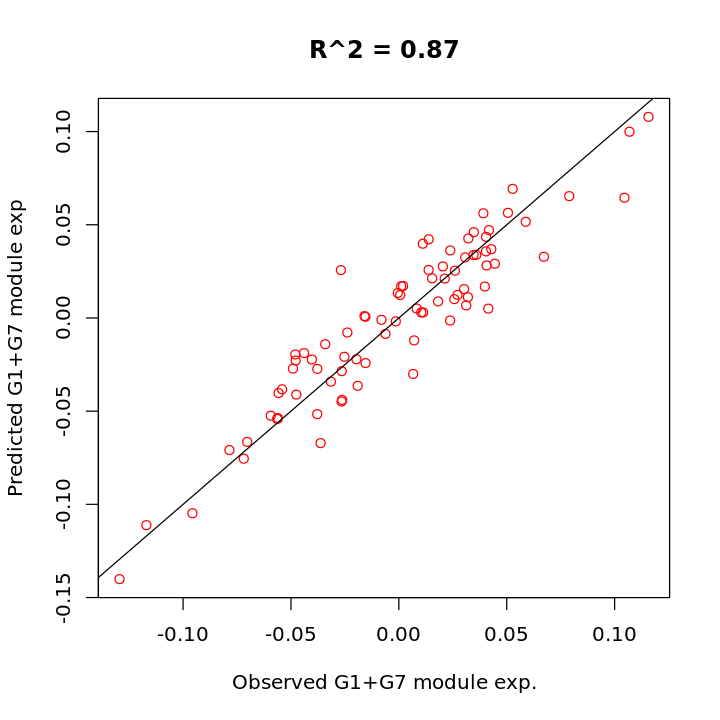

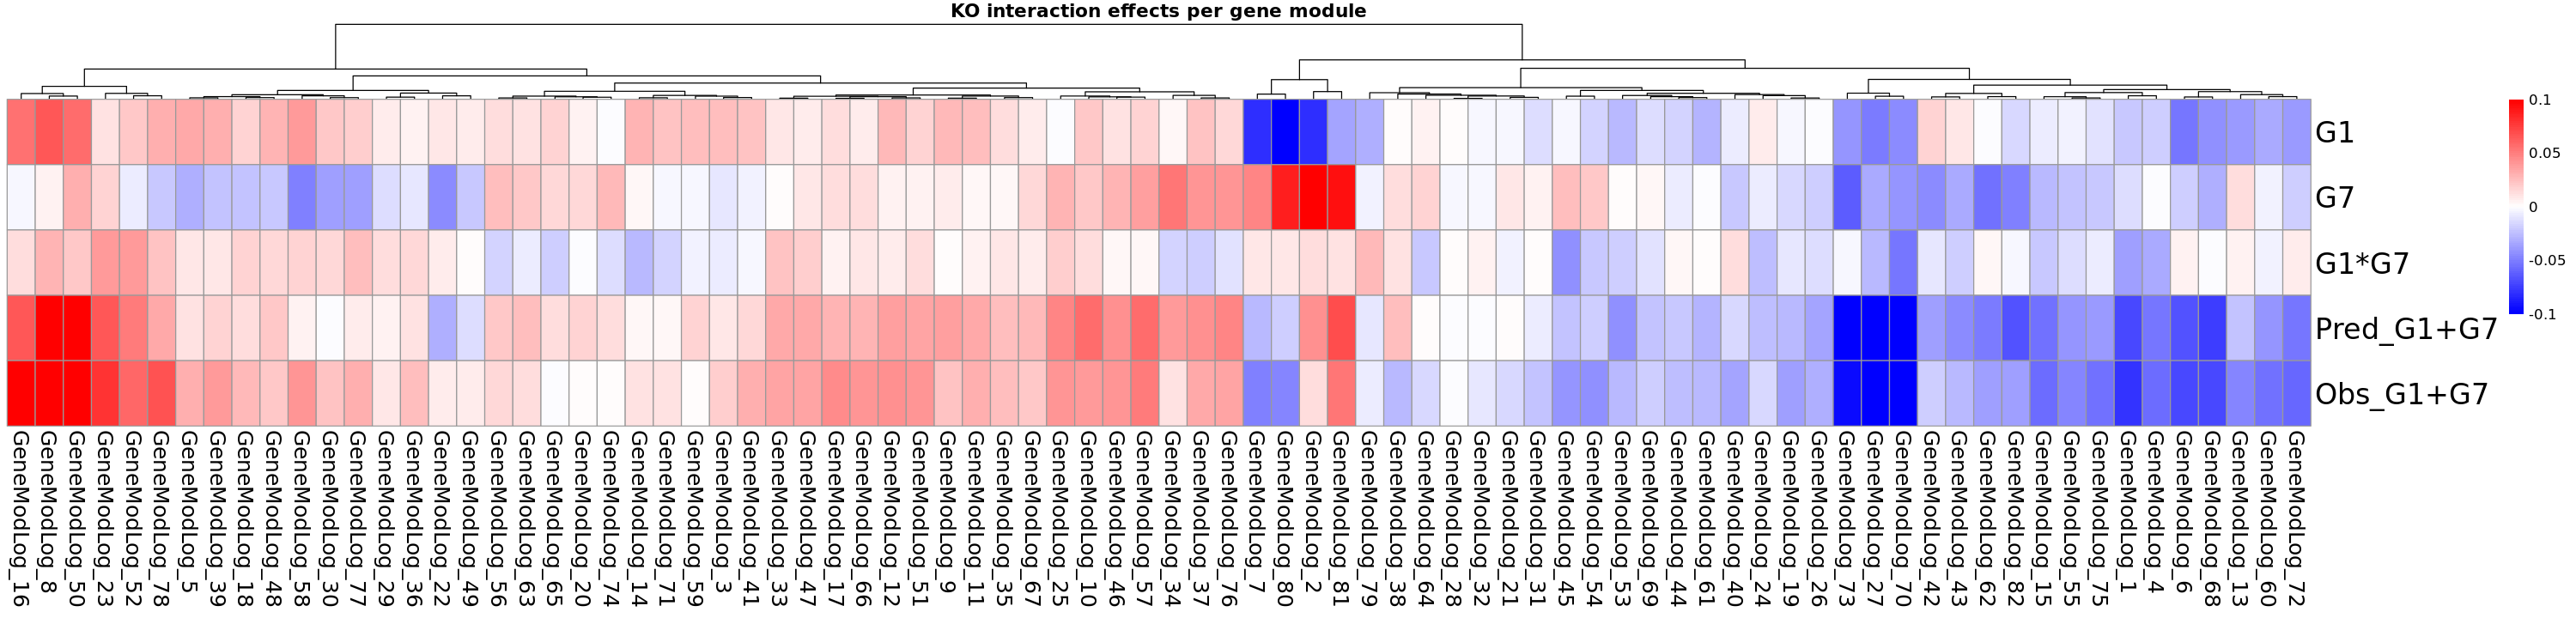

In [38]:
options(repr.plot.width=6, repr.plot.height=6)
plotTmp = predAndAct[c("G1", "G7", "G1*G7", 'Pred_G1+G7', 'Obs_G1+G7'),]
plotTmp = as.data.frame((apply(plotTmp, 1 , function(x){x-mean(x, na.rm = TRUE)})))

myR2 = round(computeR2(as.vector(plotTmp[,'Obs_G1+G7']), as.vector(plotTmp[,'Pred_G1+G7'])), digits = 2)

plot(plotTmp[,'Obs_G1+G7'], plotTmp[,'Pred_G1+G7'], xlab="Observed G1+G7 module exp.", ylab="Predicted G1+G7 module exp", col="red",
     main = paste0("R^2 = ", myR2))
abline(0,1)

options(repr.plot.width=25, repr.plot.height=6)

plotTmp[plotTmp > 0.1] = 0.1
plotTmp[plotTmp < -0.1] = -0.1

pheatmap(t(plotTmp), color = colorRampPalette(c("blue", "white", "red"))(100),
         main=("KO interaction effects per gene module"),
          clustering_method="ward.D2", 
                clustering_distance_rows="euclidean",
                clustering_distance_cols="euclidean" , cluster_rows=FALSE, fontsize_row=20, fontsize_col=15)



In [39]:
rownames(predAndAct)

[1] "Obs_G1"      "Obs_G2"      "Obs_G3"      "Obs_G4"      "Obs_G5"     
 [6] "Obs_G6"      "Obs_G7"      "Obs_G1+G2"   "Obs_G1+G3"   "Obs_G1+G4"  
[11] "Obs_G1+G5"   "Obs_G1+G6"   "Obs_G1+G7"   "Obs_G2+G3"   "Obs_G2+G4"  
[16] "Obs_G2+G5"   "Obs_G2+G6"   "Obs_G2+G7"   "Obs_G3+G4"   "Obs_G3+G5"  
[21] "Obs_G3+G6"   "Obs_G3+G7"   "Obs_G4+G5"   "Obs_G4+G6"   "Obs_G4+G7"  
[26] "Obs_G5+G6"   "Obs_G5+G7"   "Obs_G6+G7"   "conrolCells" "const"      
[31] "G1"          "G2"          "G3"          "G4"          "G5"         
[36] "G6"          "G7"          "G1*G2"       "G1*G3"       "G1*G4"      
[41] "G1*G5"       "G1*G6"       "G1*G7"       "G2*G3"       "G2*G4"      
[46] "G2*G5"       "G2*G6"       "G2*G7"       "G3*G4"       "G3*G5"      
[51] "G3*G6"       "G3*G7"       "G4*G5"       "G4*G6"       "G4*G7"      
[56] "G5*G6"       "G5*G7"       "G6*G7"       "Pred_G1"     "Pred_G1+G2" 
[61] "Pred_G1+G3"  "Pred_G1+G4"  "Pred_G1+G5"  "Pred_G1+G6"  "Pred_G1+G7" 
[66] "Pred_G2"     "Pred_G2+G3"  "Pred_G2+G4"  "Pred_G2+G5"  "Pred_G2+G6" 
[71] "Pred_G2+G7"  "Pred_G3"     "Pred_G3+G4"  "Pred_G3+G5"  "Pred_G3+G6" 
[76] "Pred_G3+G7"  "Pred_G4"     "Pred_G4+G5"  "Pred_G4+G6"  "Pred_G4+G7" 
[81] "Pred_G5"     "Pred_G5+G6"  "Pred_G5+G7"  "Pred_G6"     "Pred_G6+G7" 
[86] "Pred_G7"

In [40]:
r2dat = data.frame(matrix(0,nrow = 7, ncol=7))
rownames(r2dat) <- paste0("G_",1:7)
colnames(r2dat) <- paste0("G_",1:7)

for(i in 1:6){
    for(j in min((i+1),7):7){
        plotTmp = predAndAct[c(paste0('Pred_G',i,"+G",j), paste0('Obs_G',i,"+G",j)),]
        plotTmp = as.data.frame((apply(plotTmp, 1 , function(x){x-mean(x, na.rm = TRUE)})))

        myR2 = round(computeR2(as.vector(plotTmp[,paste0('Obs_G',i,"+G",j)]), as.vector(plotTmp[,paste0('Pred_G',i,"+G",j)])), digits = 2)
        r2dat[paste0("G_",i), paste0("G_",j)] = myR2
    }
}

In [41]:
r2dat

,G_1,G_2,G_3,G_4,G_5,G_6,G_7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
G_1,0,0.65,0.88,0.85,0.87,0.67,0.87
G_2,0,0.00,0.65,0.75,0.75,0.83,0.91
G_3,0,0.00,0.00,0.89,0.92,0.77,0.88
G_4,0,0.00,0.00,0.00,0.88,0.92,0.69
G_5,0,0.00,0.00,0.00,0.00,0.88,0.86
G_6,0,0.00,0.00,0.00,0.00,0.00,0.85
G_7,0,0.00,0.00,0.00,0.00,0.00,0.00


In [42]:
min((i+1),7)

[1] 7

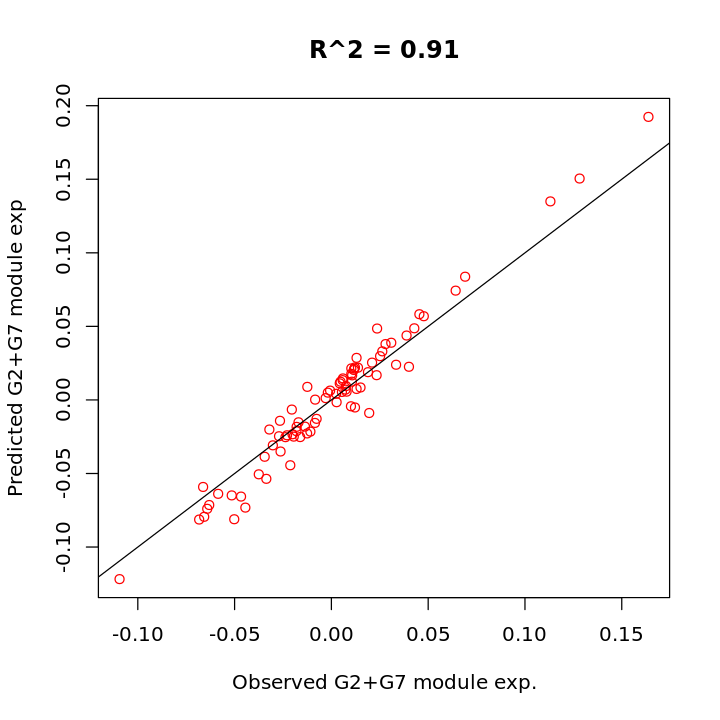

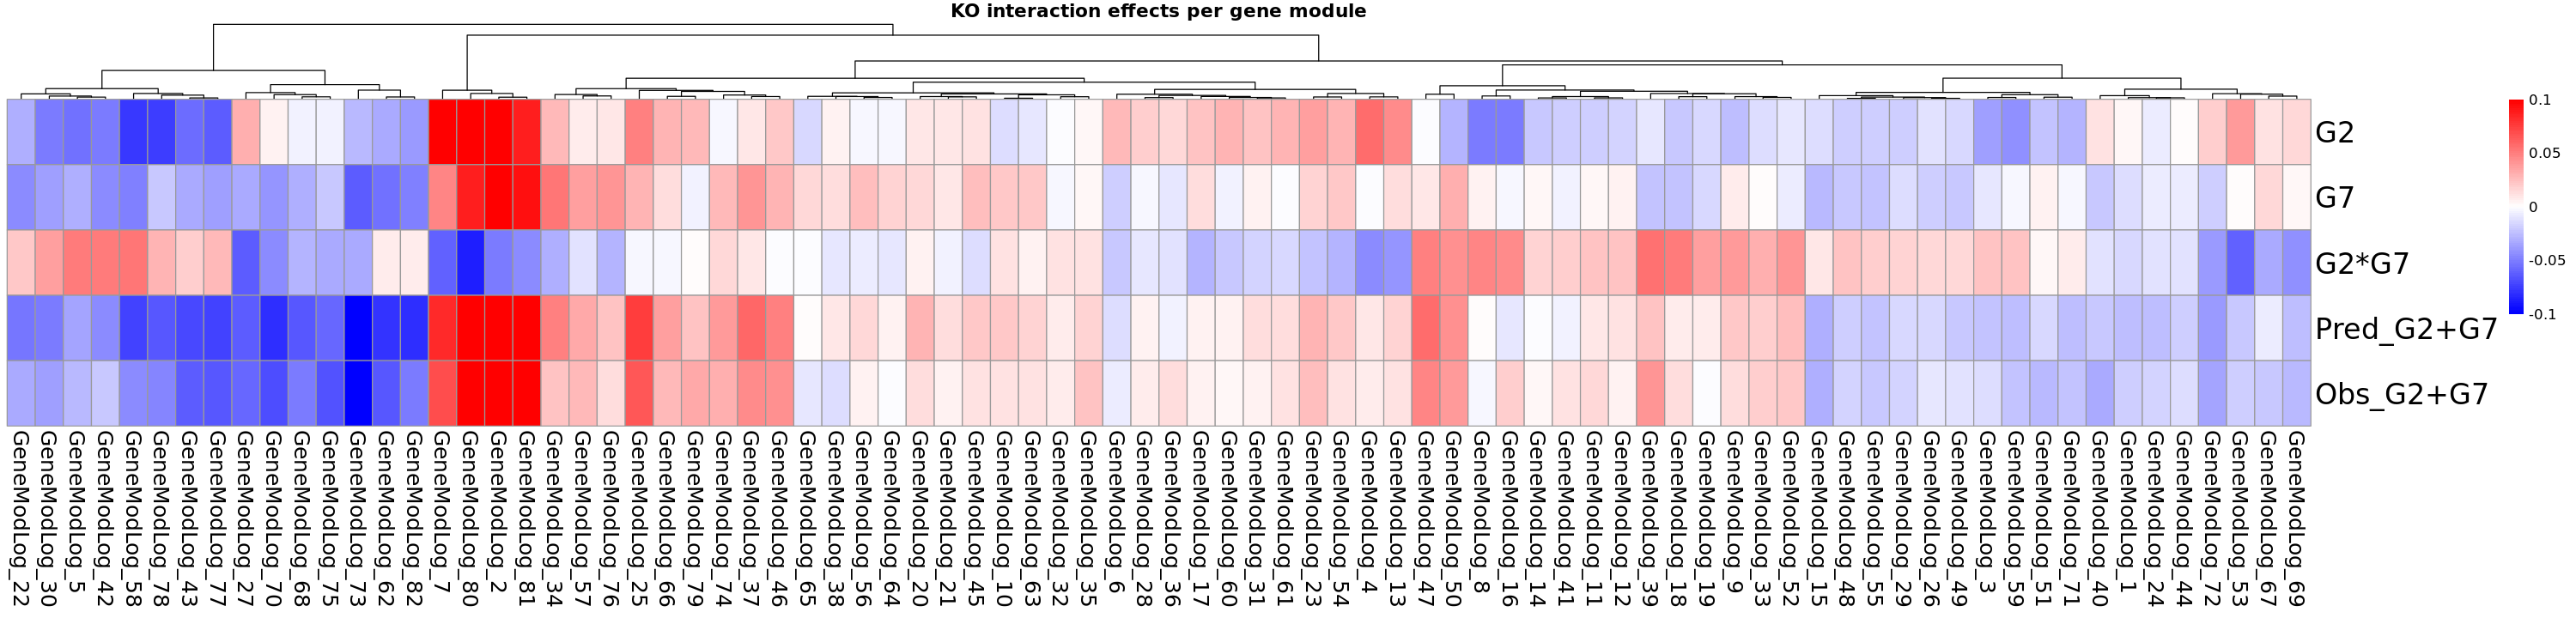

In [43]:
options(repr.plot.width=6, repr.plot.height=6)
plotTmp = predAndAct[c("G2", "G7", "G2*G7", 'Pred_G2+G7', 'Obs_G2+G7'),]
plotTmp = as.data.frame((apply(plotTmp, 1 , function(x){x-mean(x, na.rm = TRUE)})))

myR2 = round(computeR2(as.vector(plotTmp[,'Obs_G2+G7']), as.vector(plotTmp[,'Pred_G2+G7'])), digits = 2)

plot(plotTmp[,'Obs_G2+G7'], plotTmp[,'Pred_G2+G7'], xlab="Observed G2+G7 module exp.", ylab="Predicted G2+G7 module exp", col="red",
     main = paste0("R^2 = ", myR2))
abline(0,1)

options(repr.plot.width=25, repr.plot.height=6)

plotTmp[plotTmp > 0.1] = 0.1
plotTmp[plotTmp < -0.1] = -0.1

pheatmap(t(plotTmp), color = colorRampPalette(c("blue", "white", "red"))(100),
         main=("KO interaction effects per gene module"),
          clustering_method="ward.D2", 
                clustering_distance_rows="euclidean",
                clustering_distance_cols="euclidean" , cluster_rows=FALSE, fontsize_row=20, fontsize_col=15)

